<a href="https://colab.research.google.com/github/vaghemanth/EDA/blob/main/Walmart_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1GZusDx0jLpc-z39Zz5wXq5ItJ1NiNq6a"  -O walmart.csv

--2025-01-14 16:08:25--  https://drive.google.com/uc?export=download&id=1GZusDx0jLpc-z39Zz5wXq5ItJ1NiNq6a
Resolving drive.google.com (drive.google.com)... 142.251.2.100, 142.251.2.138, 142.251.2.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GZusDx0jLpc-z39Zz5wXq5ItJ1NiNq6a&export=download [following]
--2025-01-14 16:08:25--  https://drive.usercontent.google.com/download?id=1GZusDx0jLpc-z39Zz5wXq5ItJ1NiNq6a&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [application/octet-stream]
Saving to: ‘walmart.csv’

walmart.csv         100%[===================>]  21.96M  35.3MB/s    i

In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

warnings.filterwarnings('ignore')
df = pd.read_csv("walmart.csv")
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
len(df["Product_ID"].unique())

3631

In [ ]:
len(df["User_ID"].unique())

5891

In [ ]:
df_dup= df[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status']]
#df_dup = df_dup.reset_index()
print(df_dup.shape)
df_dup.head()
df_uniq = df_dup.drop_duplicates()
print(df_uniq.shape)
df_uniq.head()

(550068, 7)
(5891, 7)


User_ID Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
0  1000001      F   0-17          10             A                          2   
4  1000002      M    55+          16             C                         4+   
5  1000003      M  26-35          15             A                          3   
6  1000004      M  46-50           7             B                          2   
9  1000005      M  26-35          20             A                          1   

   Marital_Status  
0               0  
4               0  
5               0  
6               1  
9               1

In [ ]:
df_uniq["Age"].value_counts()

Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: count, dtype: int64

In [ ]:
df_uniq["Gender"].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

In [ ]:

df_uniq["City_Category"].value_counts()

City_Category
C    3139
B    1707
A    1045
Name: count, dtype: int64

In [ ]:
df_uniq["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1     2086
2     1145
3      979
4+     909
0      772
Name: count, dtype: int64

In [ ]:
df_uniq["Marital_Status"].value_counts()

Marital_Status
0    3417
1    2474
Name: count, dtype: int64

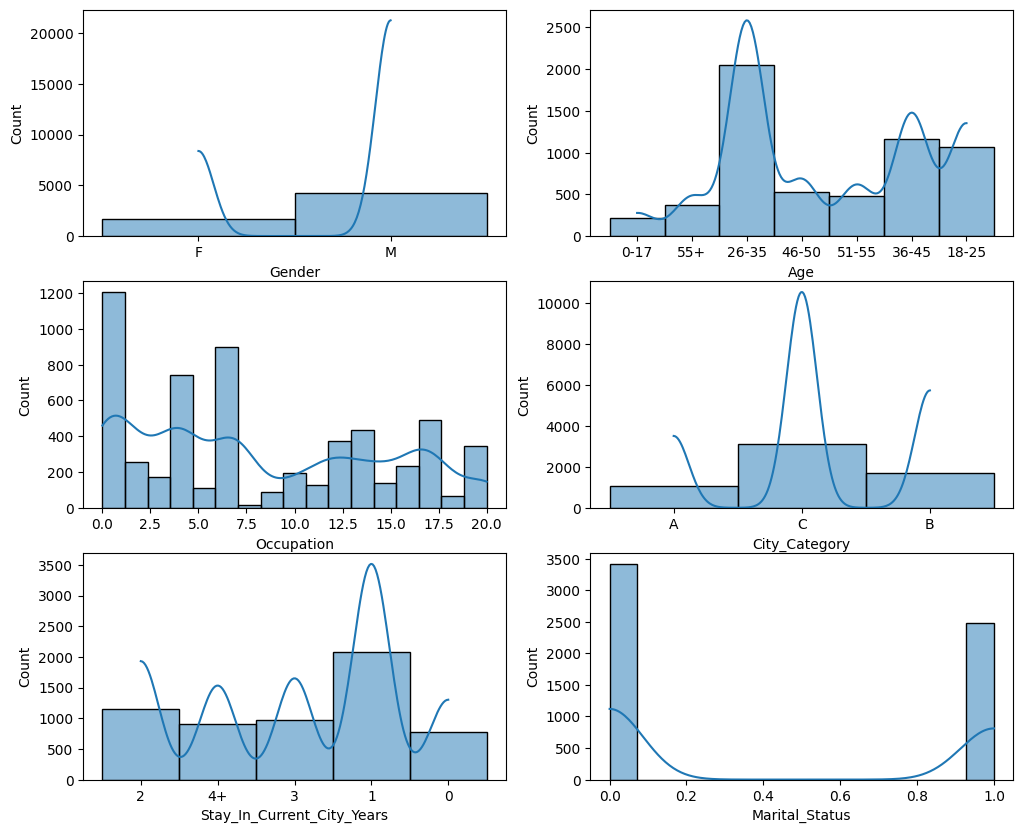

In [ ]:
#sns.histplot
variables = ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status']
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
row = 0
col = 0
for var in variables:
  sns.histplot(df_uniq, x = var, kde=True, ax=axis[row,col])
  col +=1
  if(col > 1):
    row +=1
    col = 0

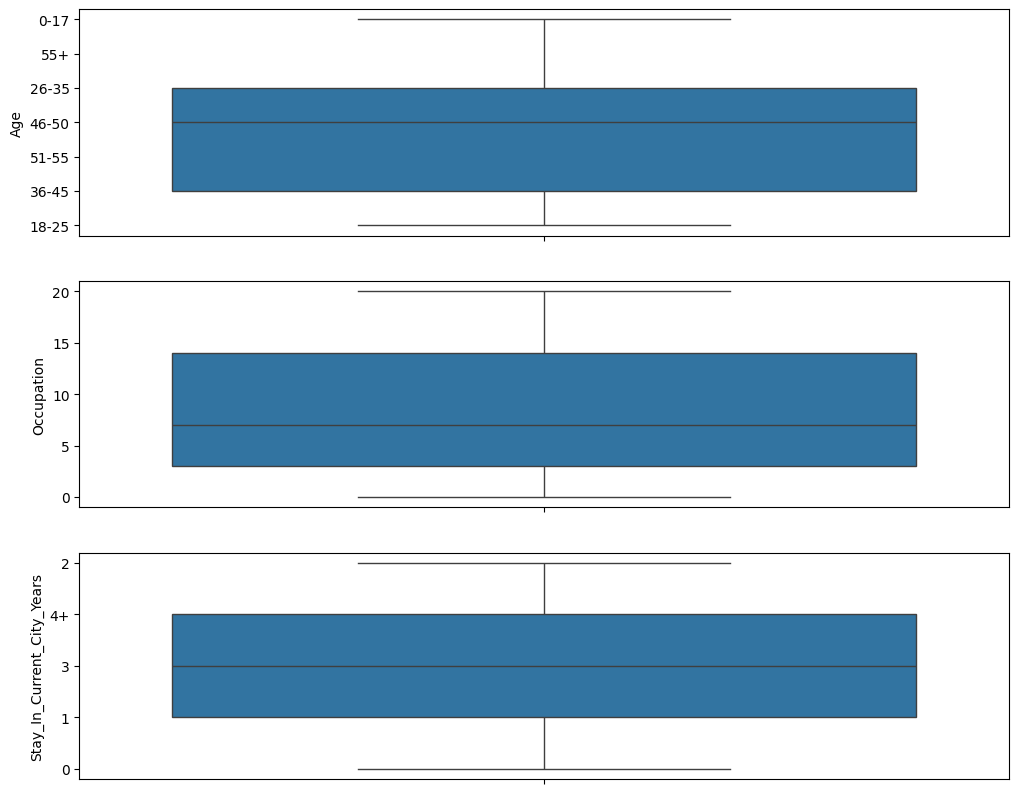

In [ ]:
#sns.boxplot
variables = ['Age', 'Occupation',
       'Stay_In_Current_City_Years']
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(12,10))
row = 0
col = 0
for var in variables:
  sns.boxplot(df_uniq, y = var, ax=axis[row])
  row +=1

In [ ]:
df_F_Purchase = df[df["Gender"] == 'F']["Purchase"]
df_F_sum = df_F_Purchase.sum()
df_F_avg = df_F_Purchase.sum()/df_F_Purchase.shape[0]
print("Average Spend by Females:{df_F_avg}")
#df_F_avg

In [ ]:
df_M_Purchase = df[df["Gender"] == 'M']["Purchase"]
df_M_sum = df_M_Purchase.sum()
df_M_avg = df_M_Purchase.sum()/df_M_Purchase.shape[0]
print("Average Spend by Males:{df_M_avg}")
#df_M_avg

In [ ]:
print(f"Average Spend by Females:{df_F_avg}")
print(f"Average Spend by Males:{df_M_avg}")

Average Spend by Females:8734.565765155476
Average Spend by Males:9437.526040472265


In [ ]:
if(df_F_sum> df_M_sum):
  print("Female purchases as a total are more than Male purchases")
else:
  print("Male purchases as a total are more than Female purchases")

Male purchases as a total are more than Female purchases


In [ ]:
if(df_F_avg> df_M_avg):
  print("Female average purchaseis more than Male purchases")
else:
  print("Male average purchaseis more than Female purchases")

Male average purchaseis more than Female purchases


In [ ]:
def Sample_mean_distri_plot(sample_l, cat_l, smp_size=500,no_itr=5000,conf_level=0.95,no_of_tails=1):
  samp_len = len(cat_l)

  ln_style_l = ['dashed', 'dotted','solid','dashdot','dashed','dotted','solid','dashdot']
  color_l = ['r', 'b', 'g','c','m','y','k','w']

  lwr_limit = []
  upr_limit = []

  mean = []
  sigma = []

  fig, ax = plt.subplots(figsize=(14,6))

  for i in range(samp_len):
    smp_mean = []
    for j in range(no_itr):
        smp_n = np.random.choice(sample_l[i], size = smp_size, replace=True)
        smp_mean.append(np.mean(smp_n))

    alpha = (1 - conf_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)

    mean.append(np.mean(smp_mean))
    sigma.append(np.std(smp_mean))

    #print(f"{z_critical}- {alpha}- {sigma1}")

    lwr_limit.append(mean[i] - (z_critical * sigma[i]))
    upr_limit.append(mean[i] + (z_critical * sigma[i]))
    sns.kdeplot(data=smp_mean,
              #color="#A0C4E8",
              fill=True, linewidth=3)

    #print(f"{lwr_limit1}")
  for i in range(samp_len):
    label_mean=("mu ({}) :  {:.2f}".format(cat_l[i], mean[i]))
    label_ult=("Lower Limit({}):{:.2f}\n Upper Limit({}):{:.2f}".format(cat_l[i], lwr_limit[i], cat_l[i], upr_limit[i]))

    plt.axvline(mean[i], color = color_l[i], linestyle = ln_style_l[i], linewidth = 2,label=label_mean)
    plt.axvline(upr_limit[i], color = color_l[i], linestyle = ln_style_l[i], linewidth = 2,label=label_ult)
    plt.axvline(lwr_limit[i], color = color_l[i], linestyle = ln_style_l[i], linewidth = 2)

  plt.legend(loc='upper right')

  plt.title(f"Sample Size: {smp_size}, Conf Level: {conf_level}")
  plt.xlabel('Purchase')
  plt.show()

  return mean, np.round(lwr_limit,2), np.round(upr_limit,2)

In [ ]:
df_male_purchase = df[df['Gender'] == 'M']['Purchase']
df_female_purchase = df[df['Gender'] == 'F']['Purchase']

# ***Male and Female Purchase Analysis***


Male vs Female Sample distribution with ci:90.0%





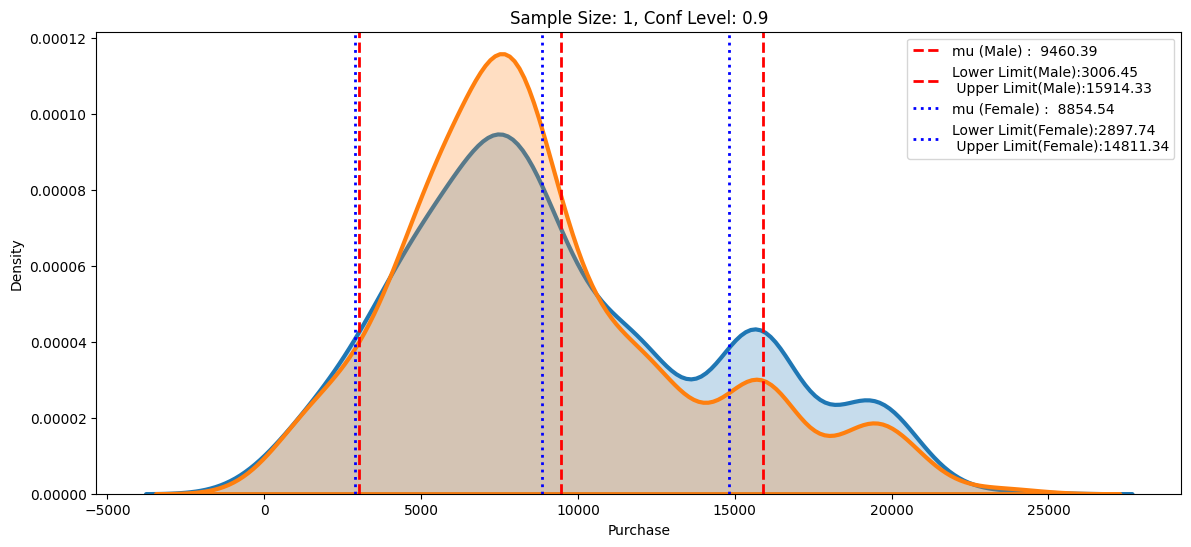

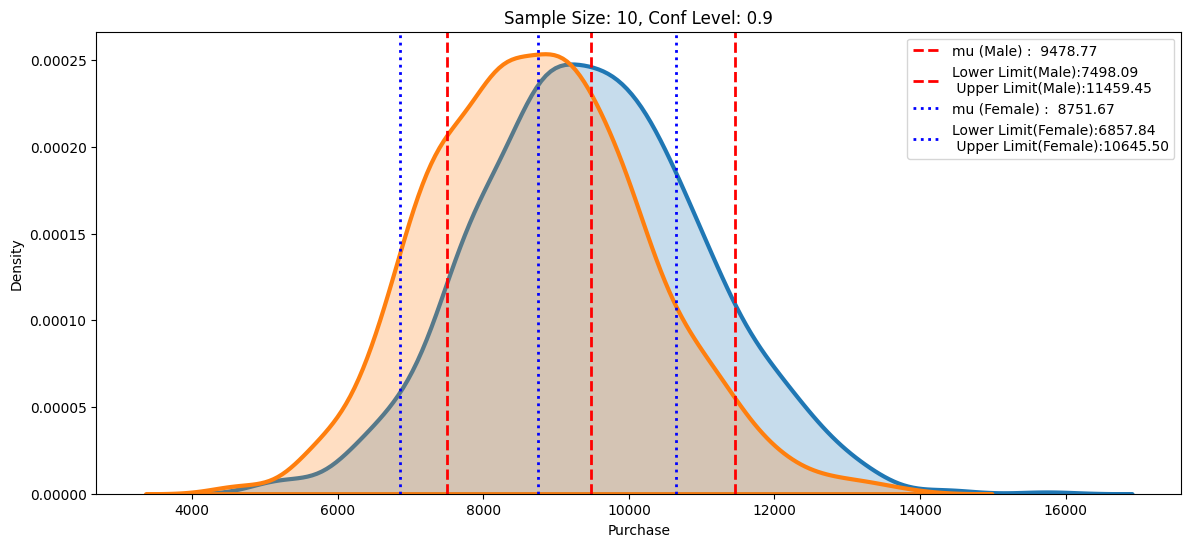

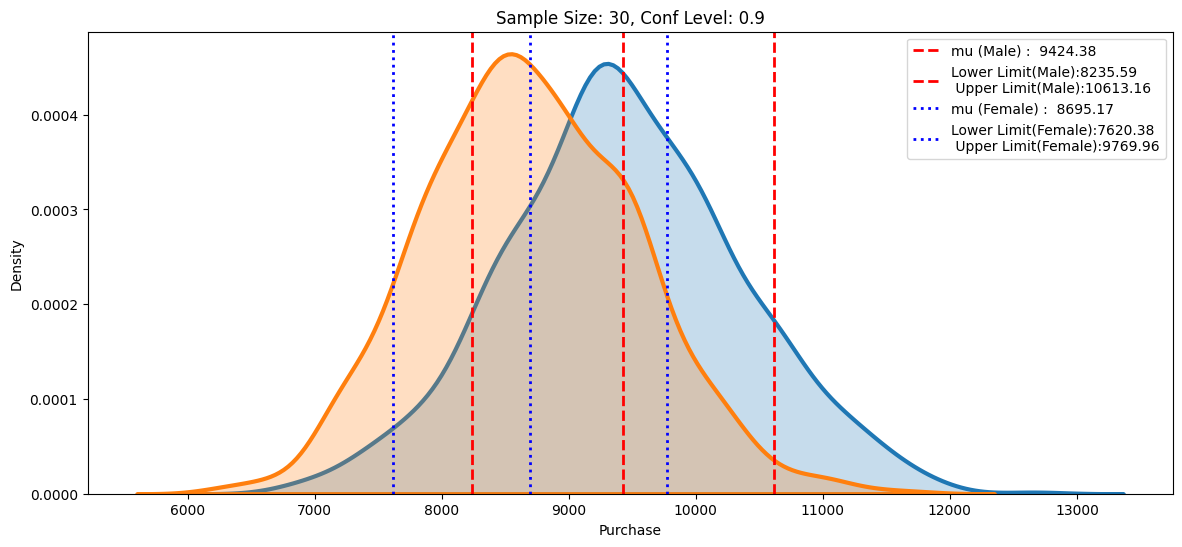

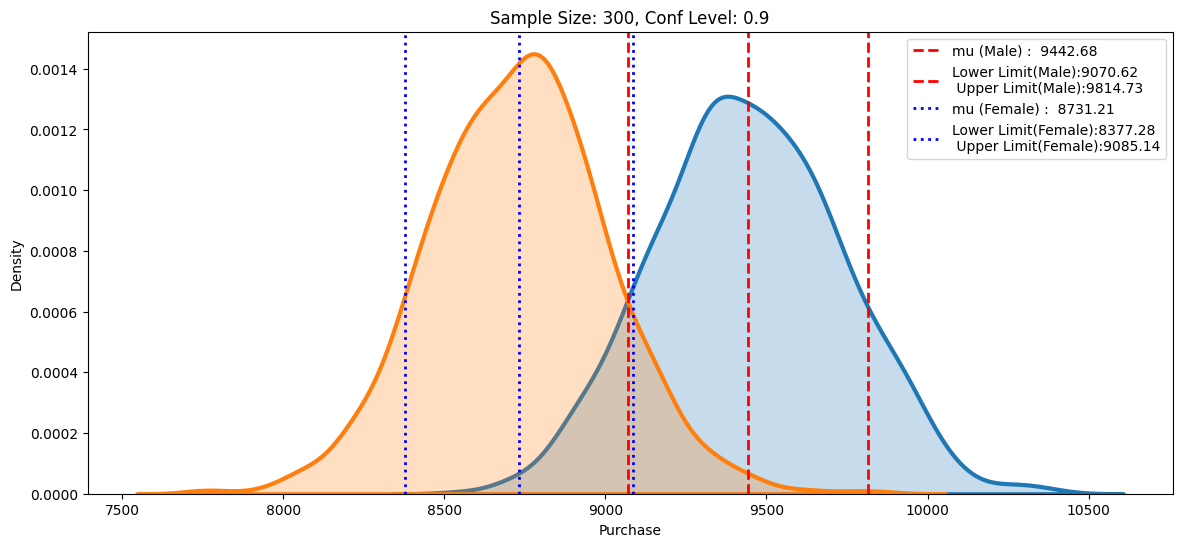

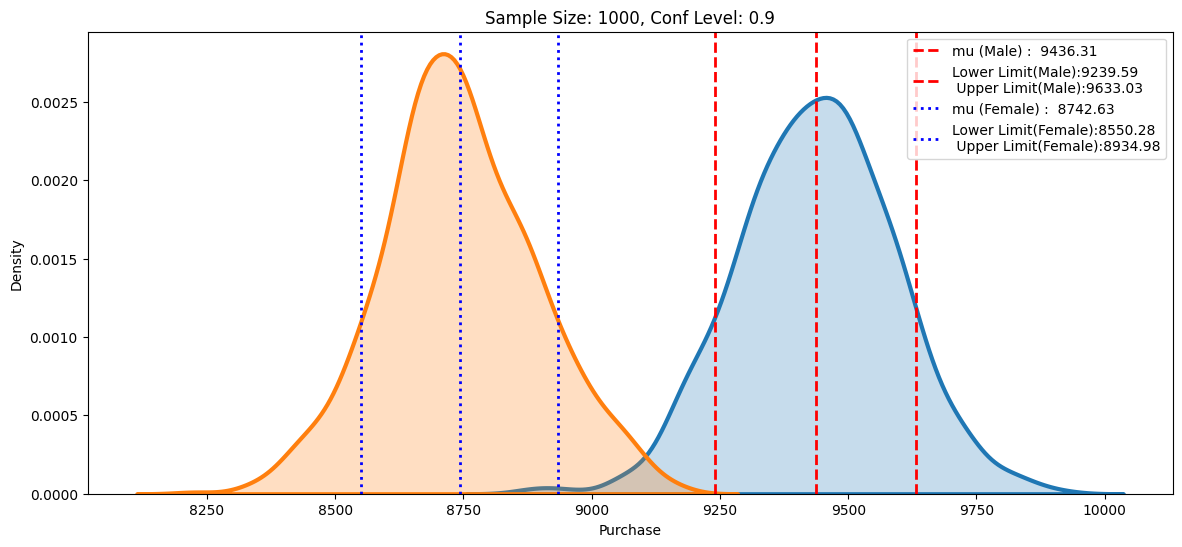

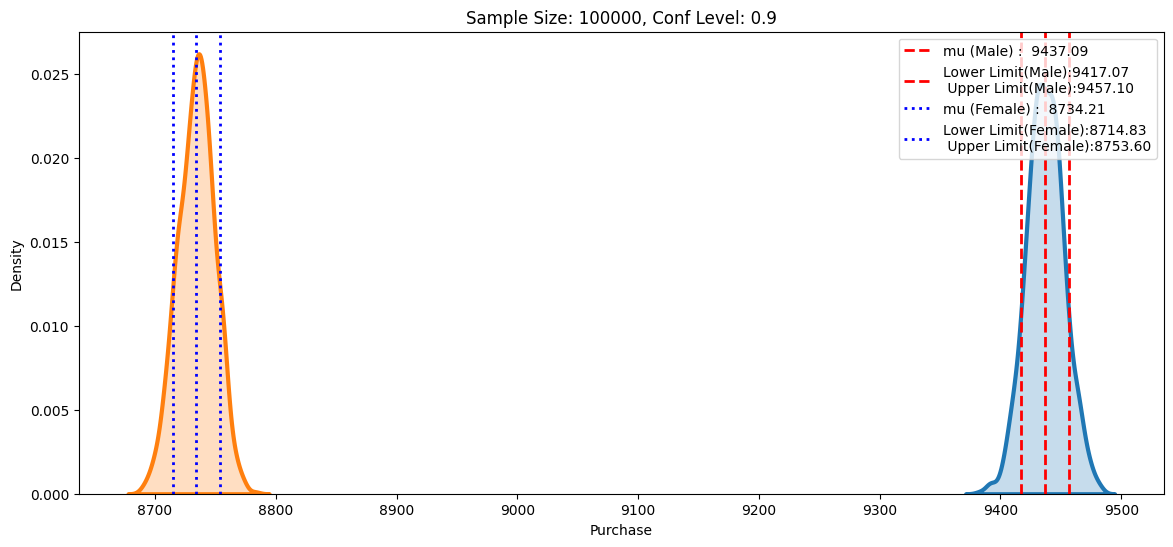


Male vs Female Sample distribution with ci:95.0%





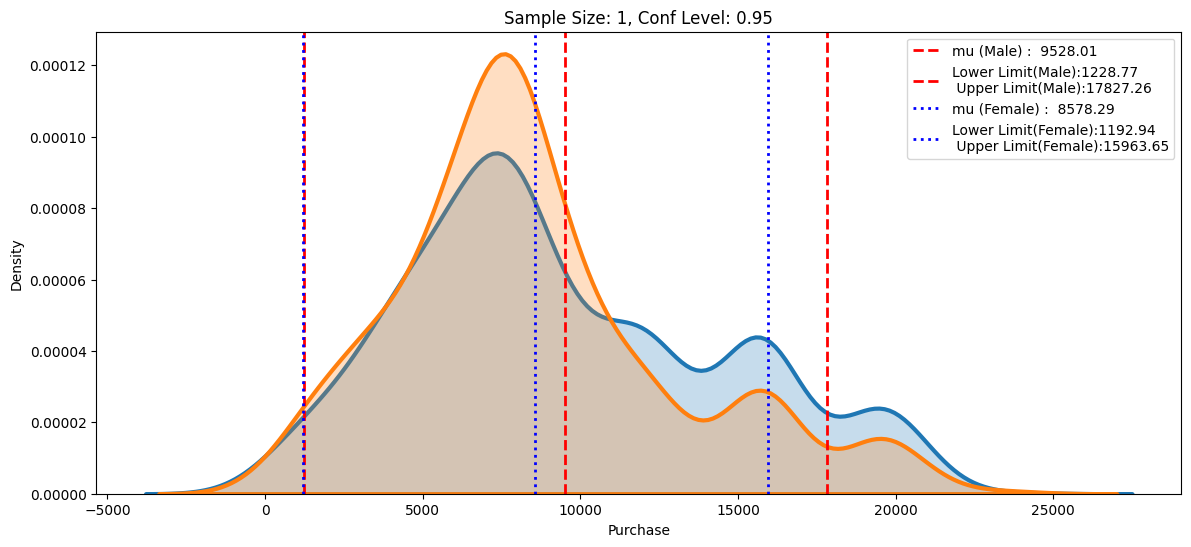

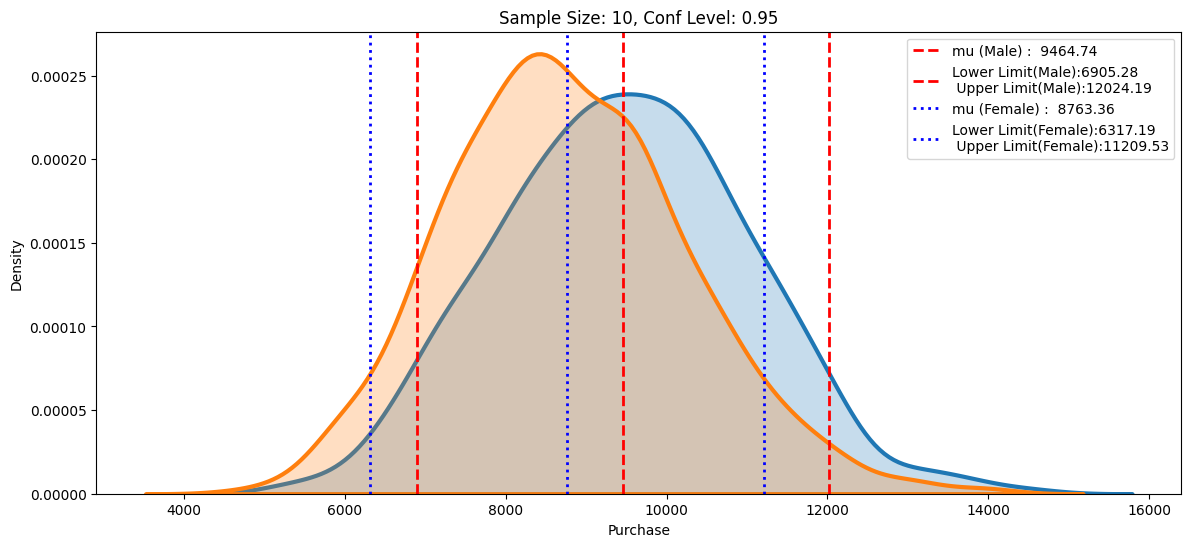

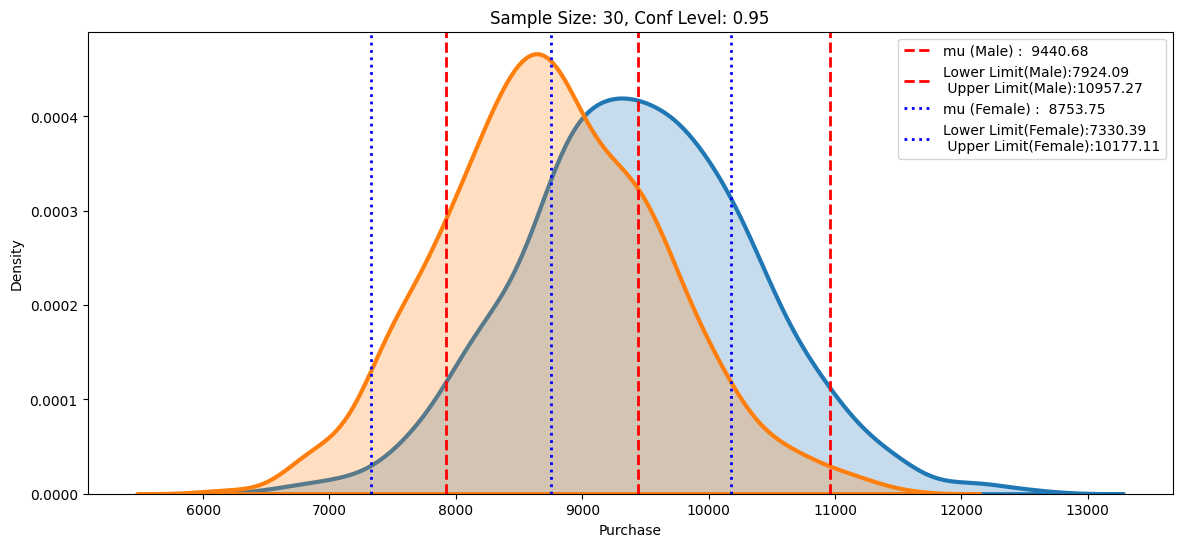

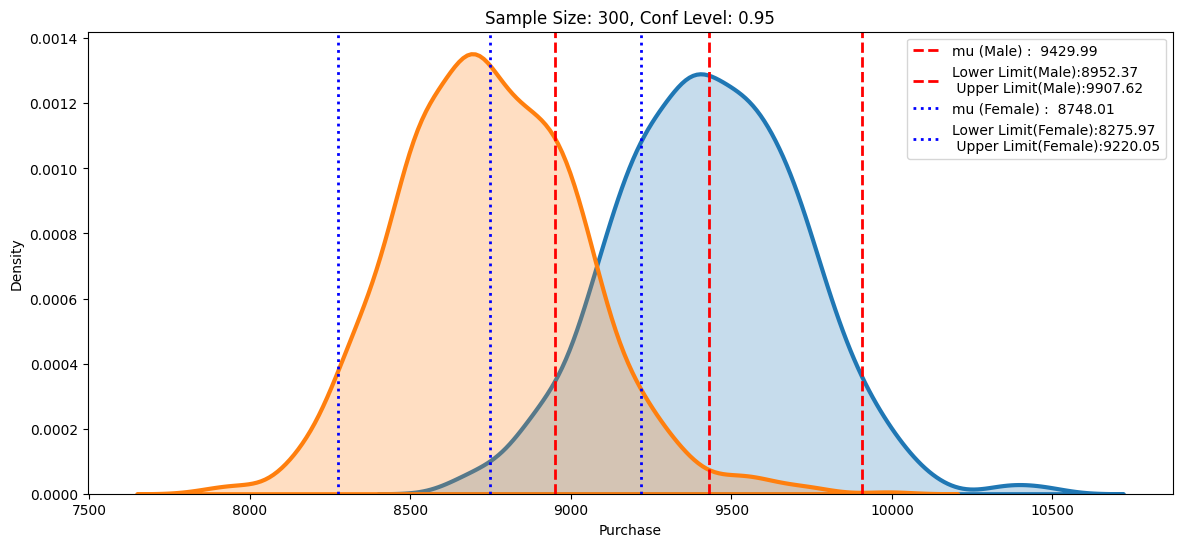

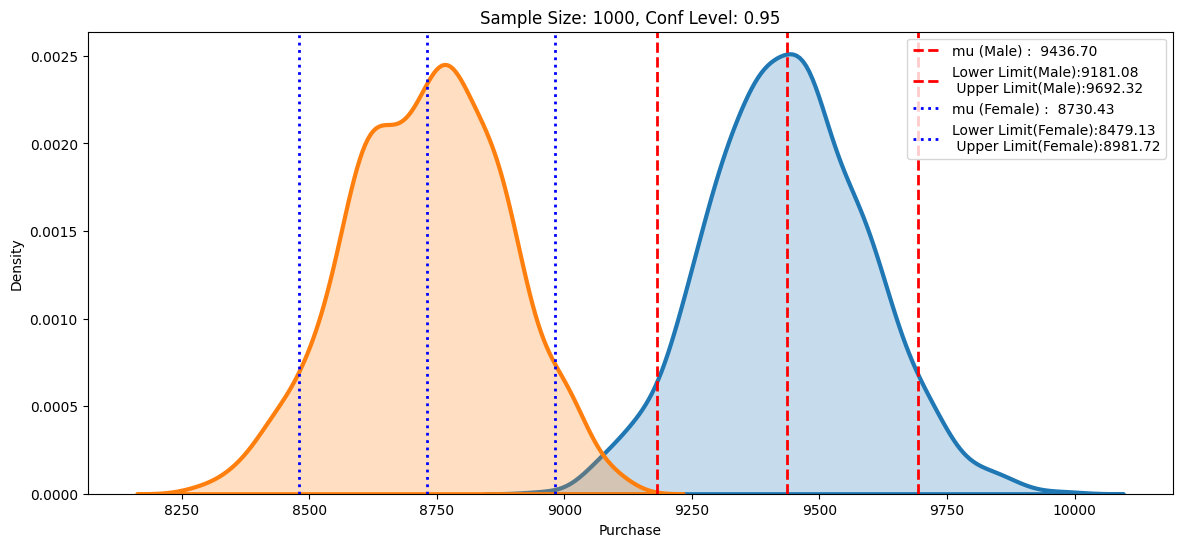

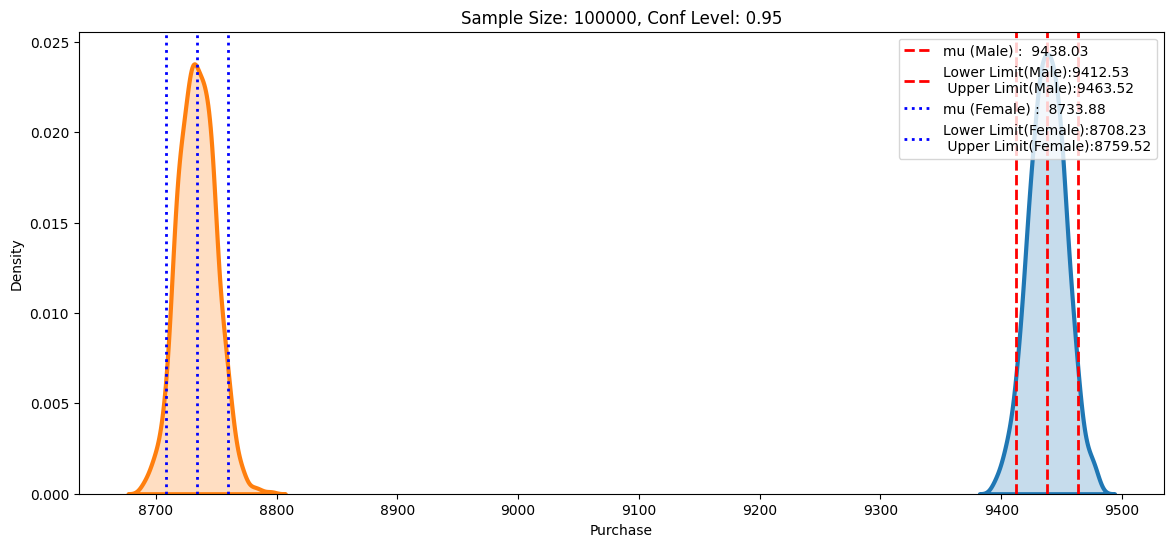


Male vs Female Sample distribution with ci:99.0%





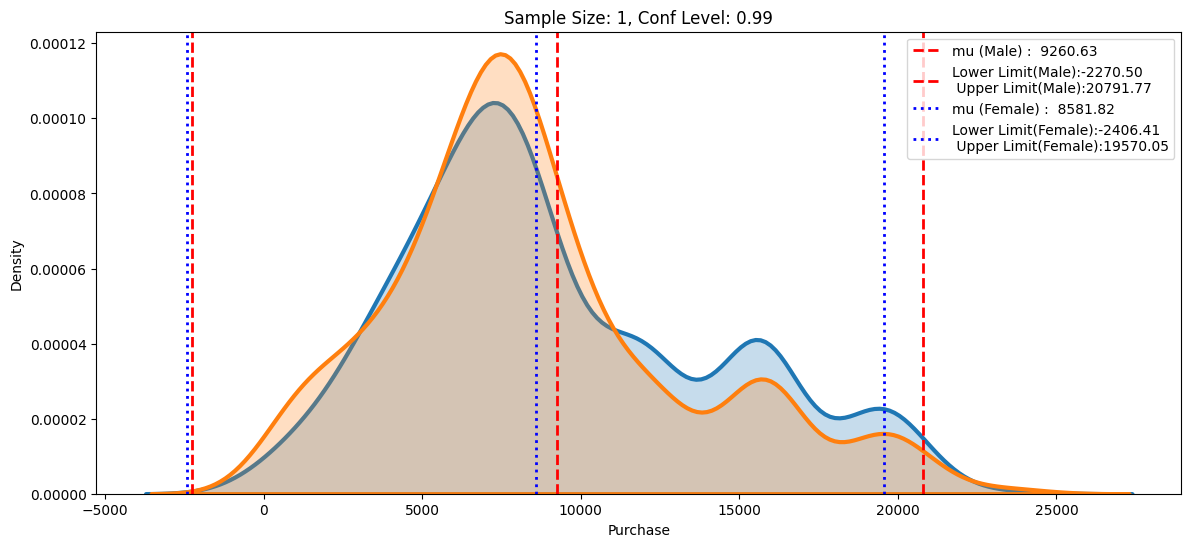

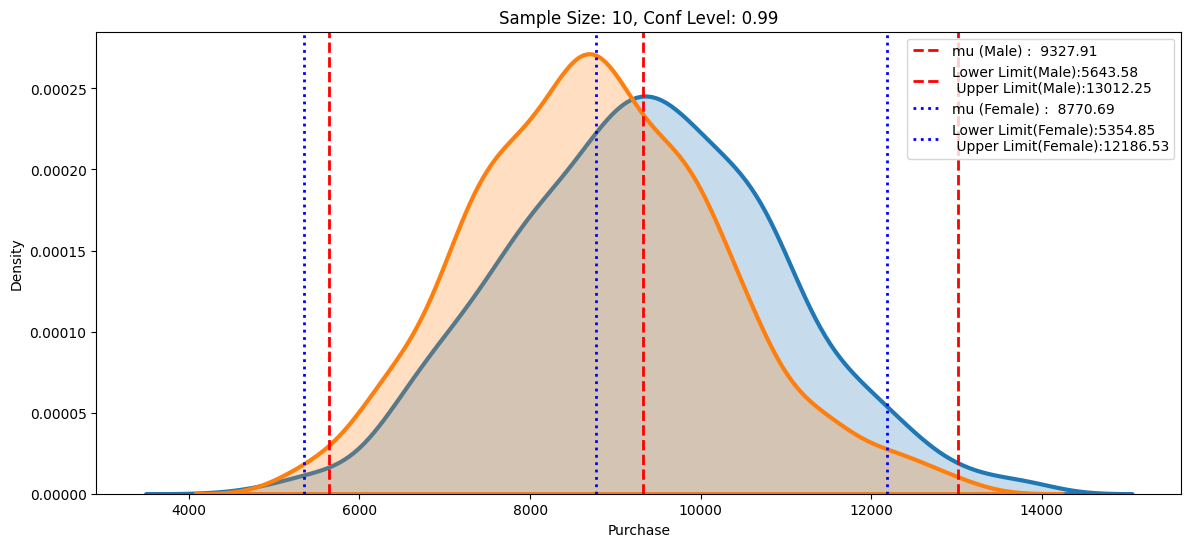

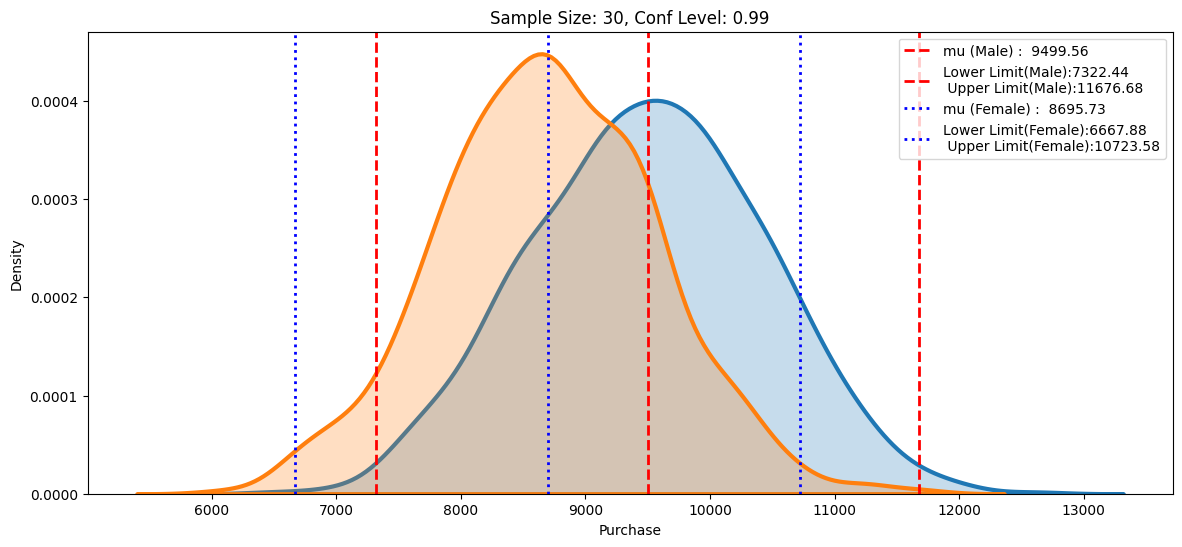

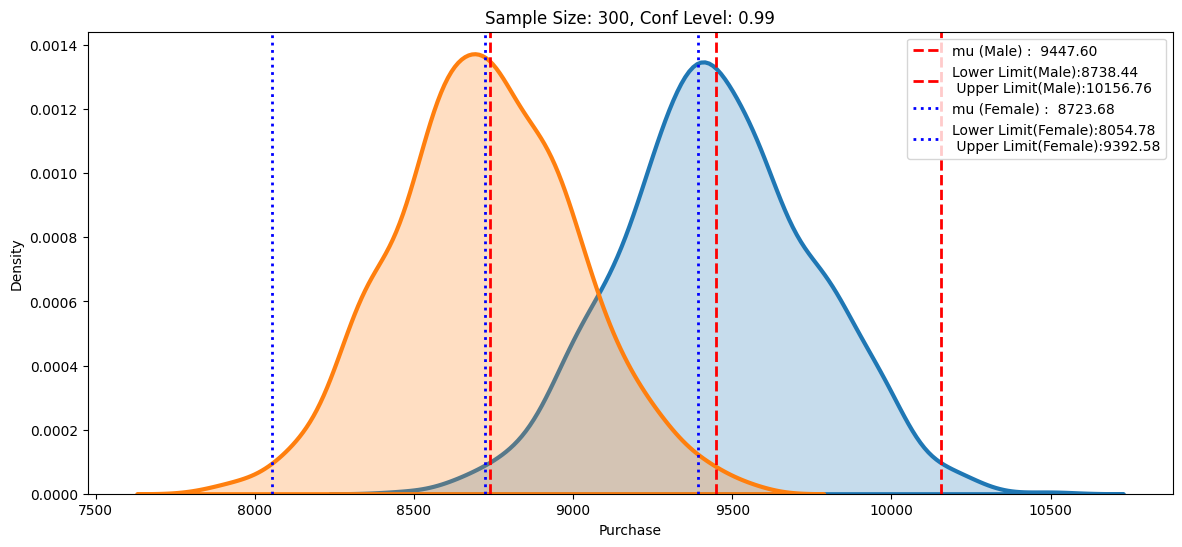

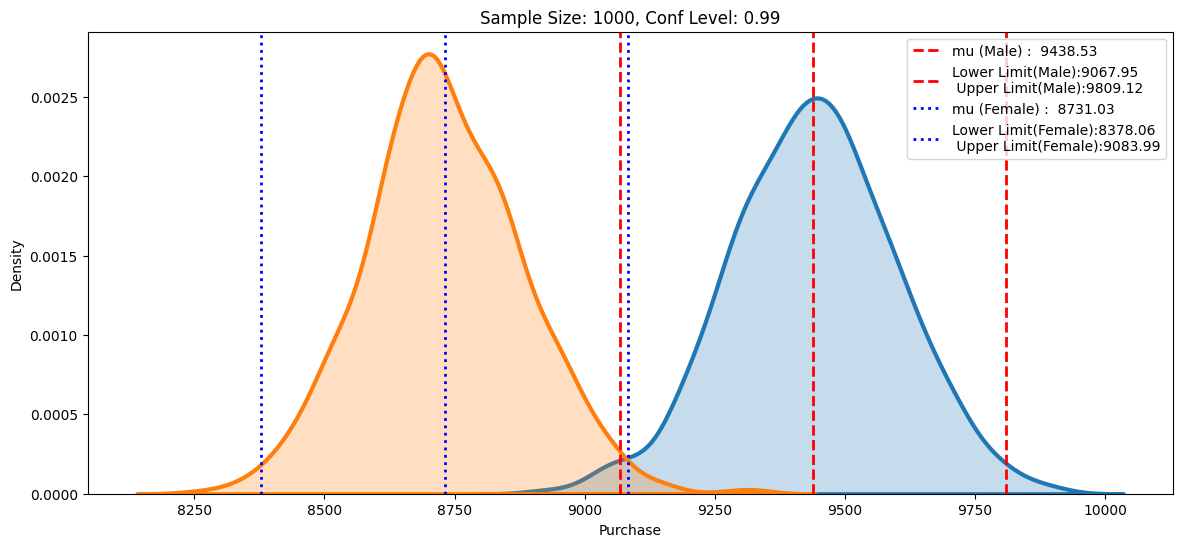

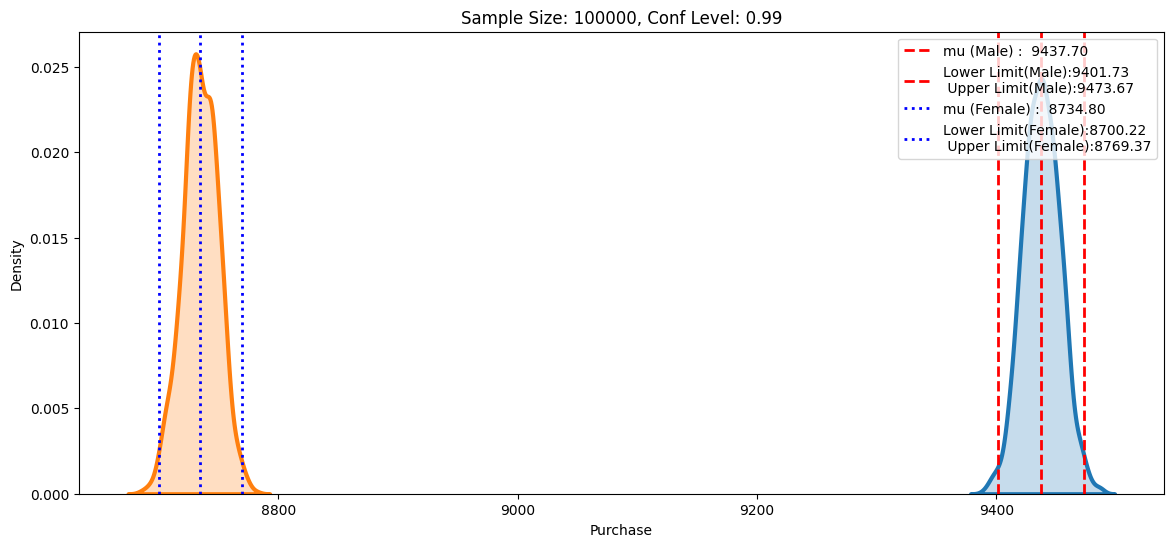

In [ ]:
itr_size = 1000
sampling_size_l = [1, 10, 30, 300, 1000, 100000]
conf_intrvl_l = [0.90, 0.95, 0.99]

df_cat_purchase = [df_male_purchase, df_female_purchase]
#print(len(df_cat_purchase))
cat_l = ["Male", "Female"]

for ci_i in conf_intrvl_l:
  print(f"\nMale vs Female Sample distribution with ci:{ci_i*100}%\n")
  array = []
  for smpl_size in sampling_size_l:
    print("\n")
    avg, ll, ul = Sample_mean_distri_plot(df_cat_purchase,
                                          cat_l,
                                          smpl_size, itr_size, ci_i)
    for i in range(len(cat_l)):
      array.append(np.array([cat_l[i], ll[i], ul[i], smpl_size, ul[i]-ll[i], ci_i]))

overlap_gender = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])


As you can see from the above Probabilistic distributions-
* For sample size >30, the distributions strt to resemble Normal/Guassian/ Bell curve distribution
* As we go further and increase more the sample size, for a sample of 100000, the peaks for distributions become more narrower, with less variance in the peak, and peak more narrower centered towards average mean
* And Fianlly, you can see from the distribution above, the eaverage spend of Male is greater than Females, which matches with the calcualted part just above.

# Married and Unmarried Purchase Analysis


In [ ]:
df_unmarried_purchase = df[df['Marital_Status'] == 0]['Purchase']
df_married_purchase = df[df['Marital_Status'] == 1]['Purchase']


 Unmarried vs Married Sample distribution with ci:90.0%





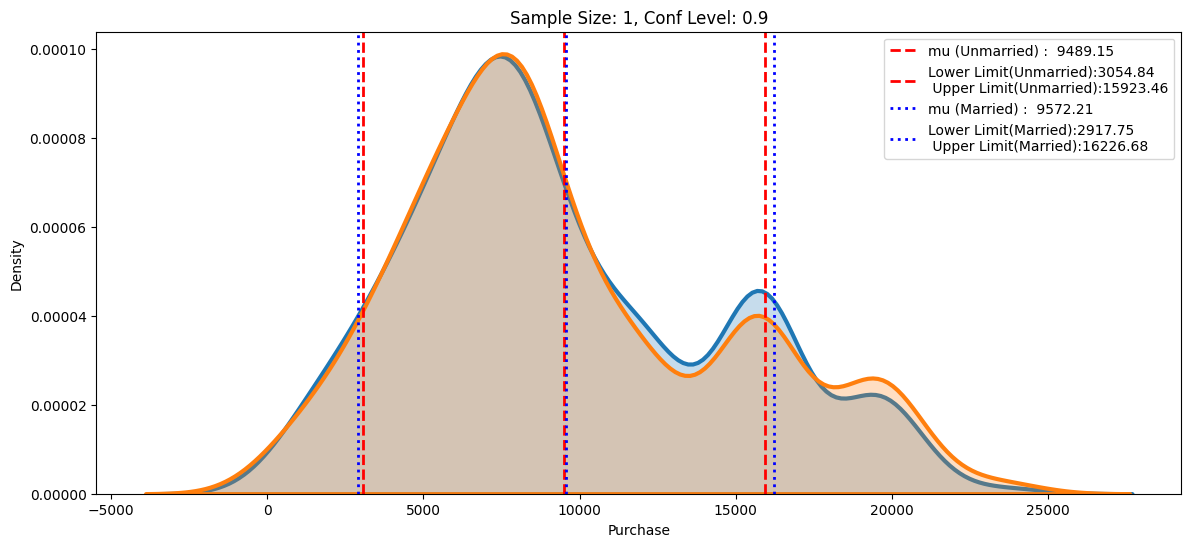

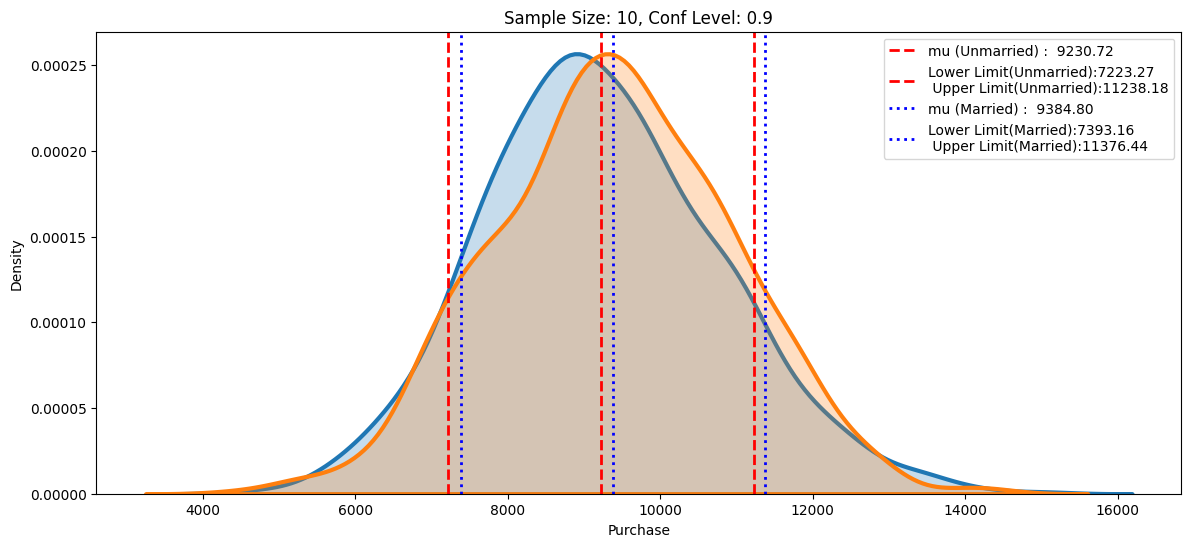

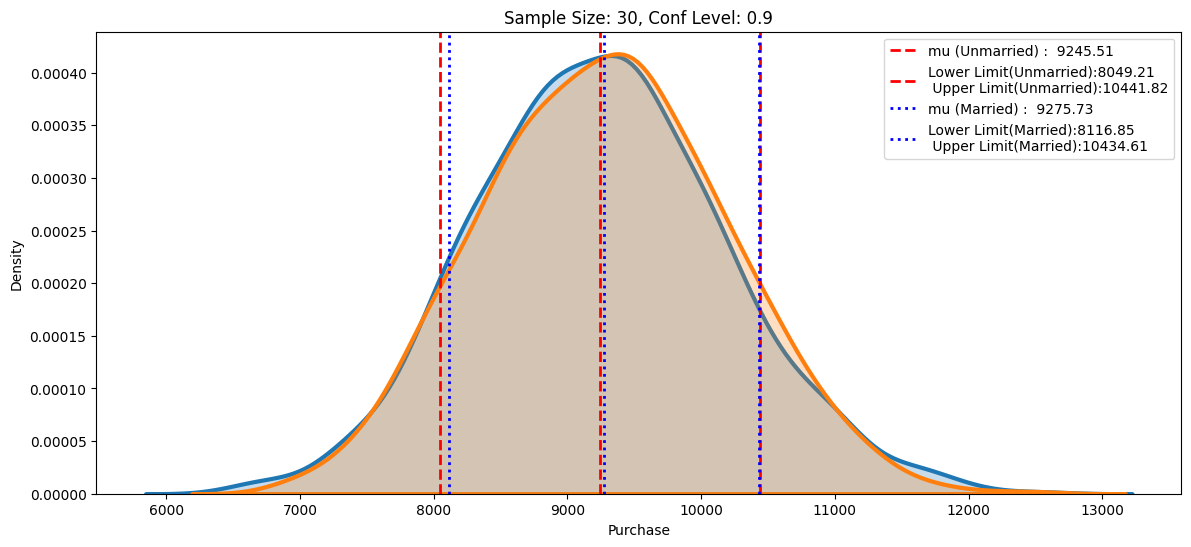

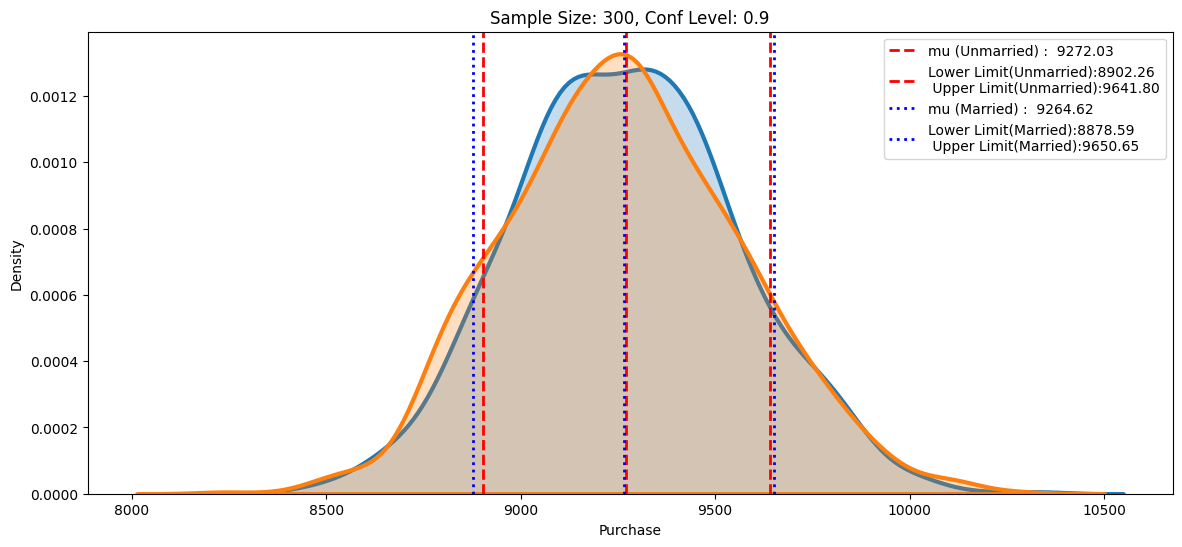

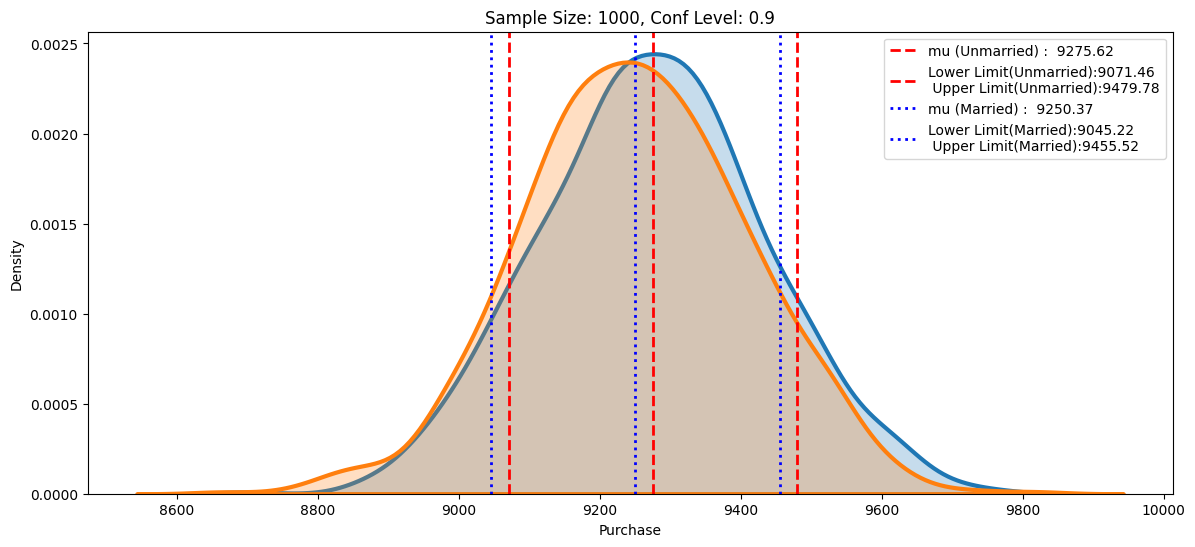

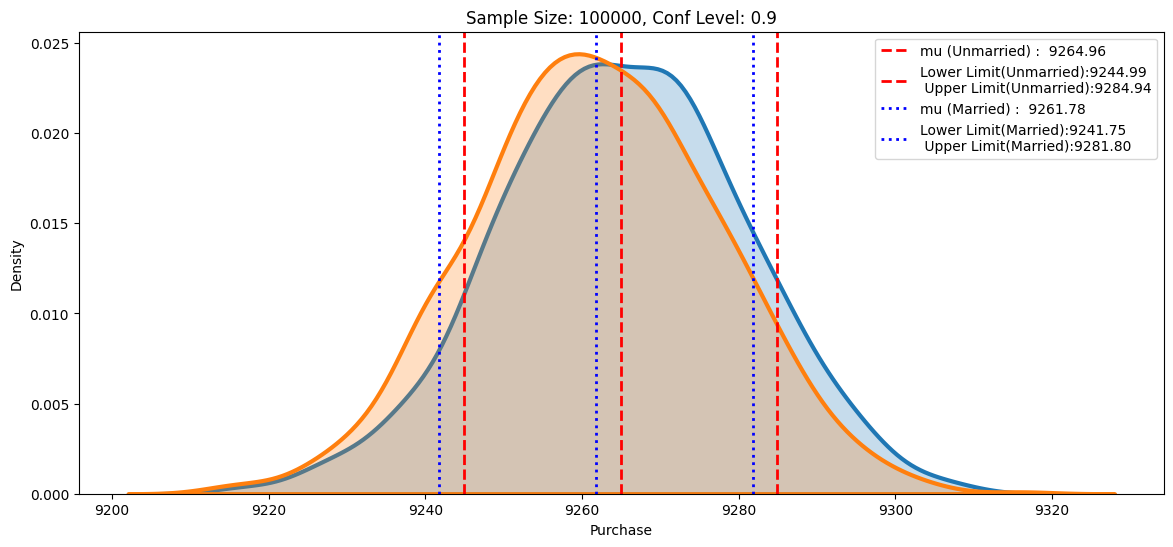


 Unmarried vs Married Sample distribution with ci:95.0%





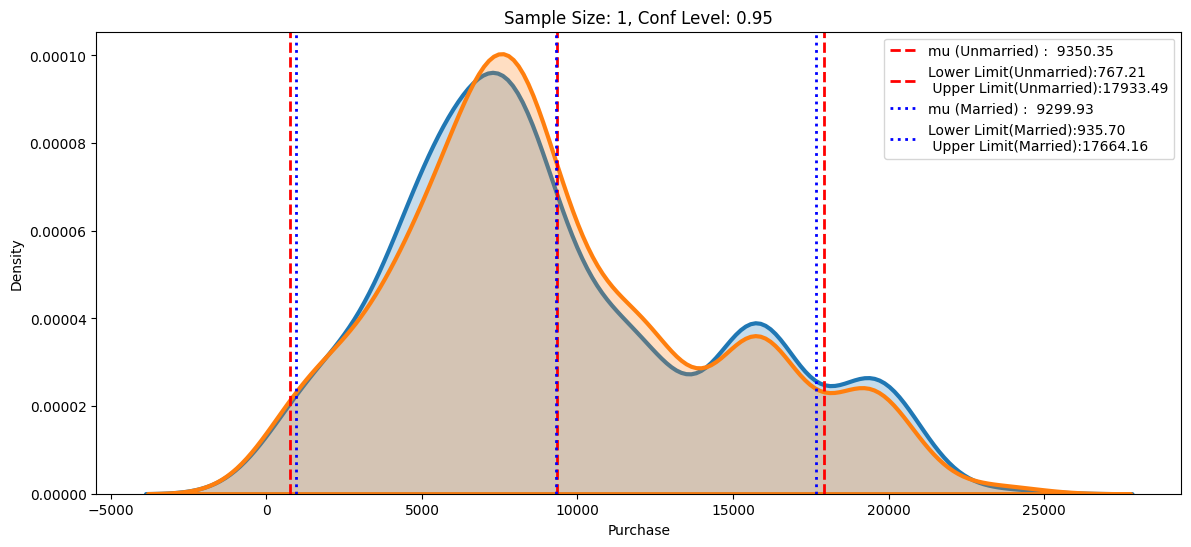

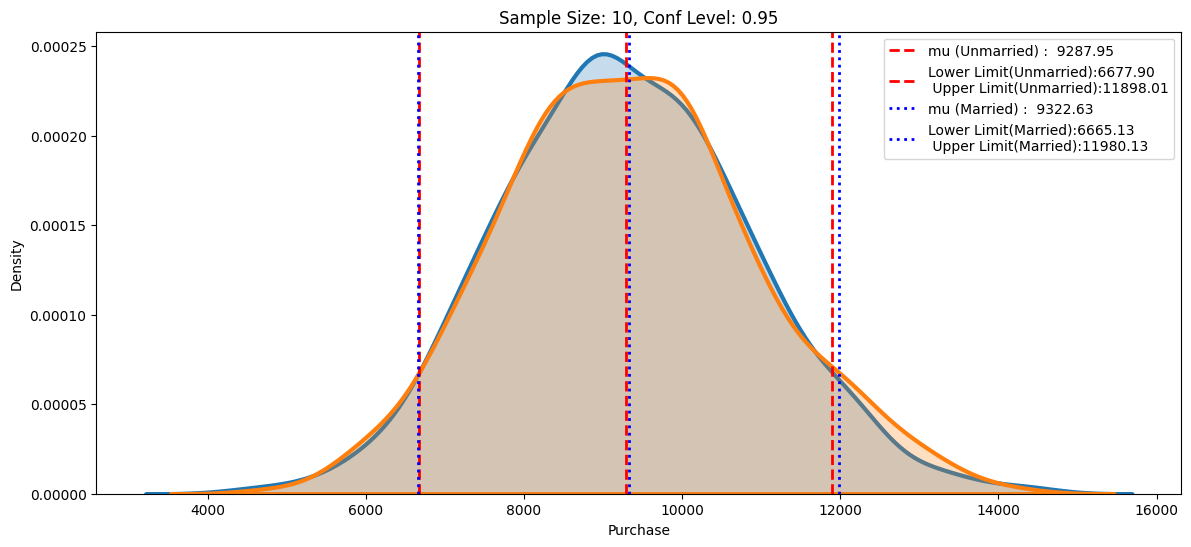

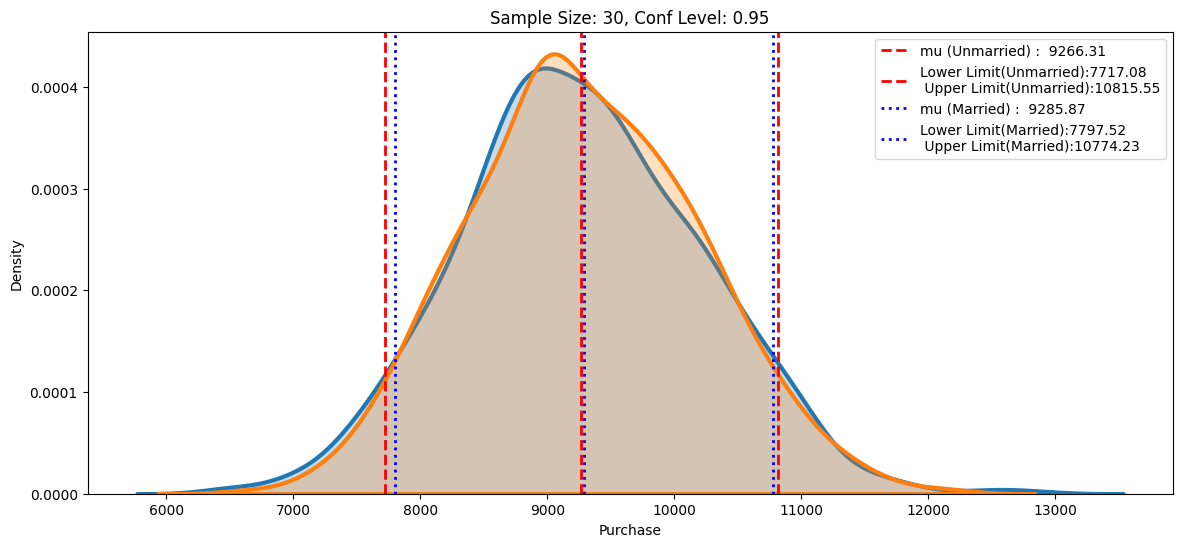

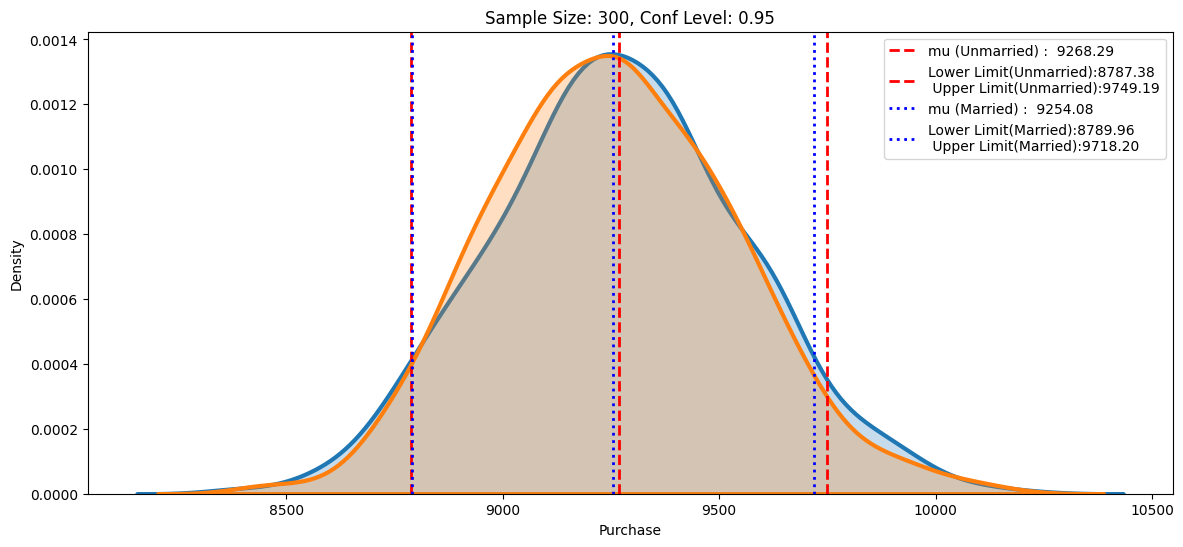

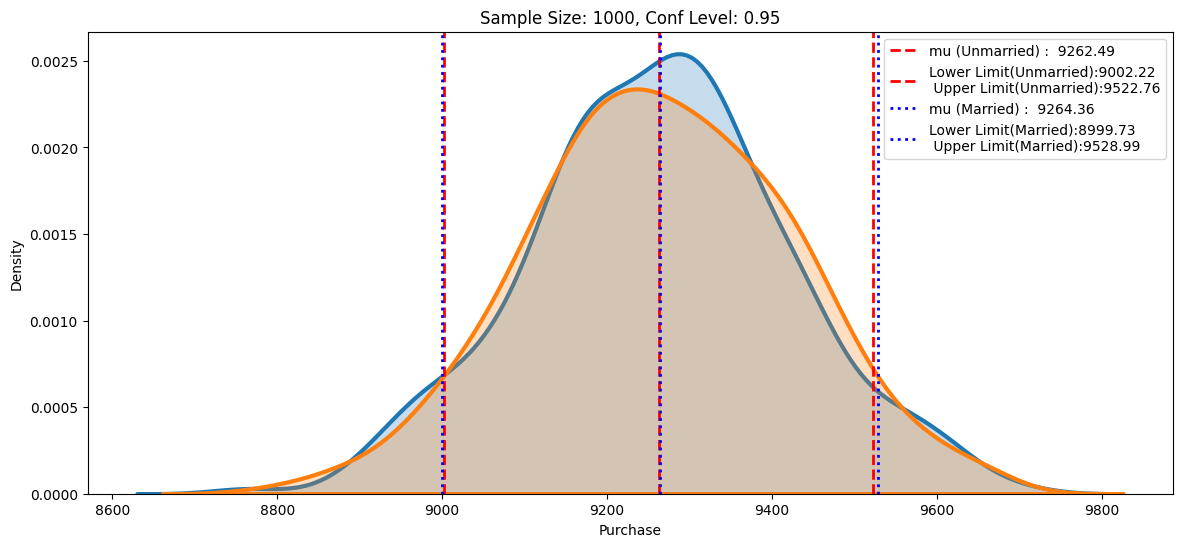

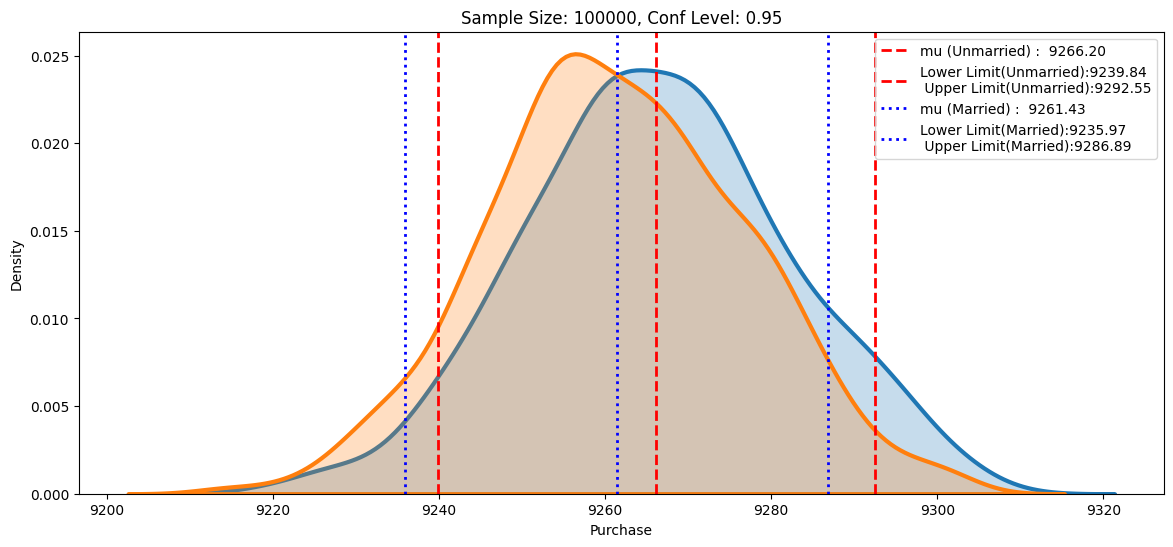


 Unmarried vs Married Sample distribution with ci:99.0%





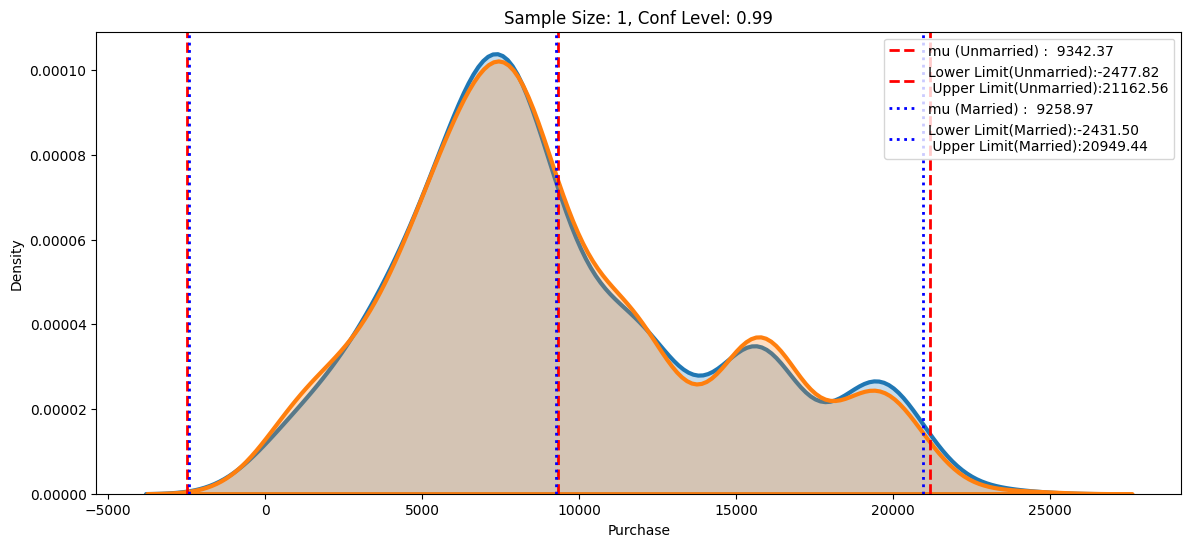

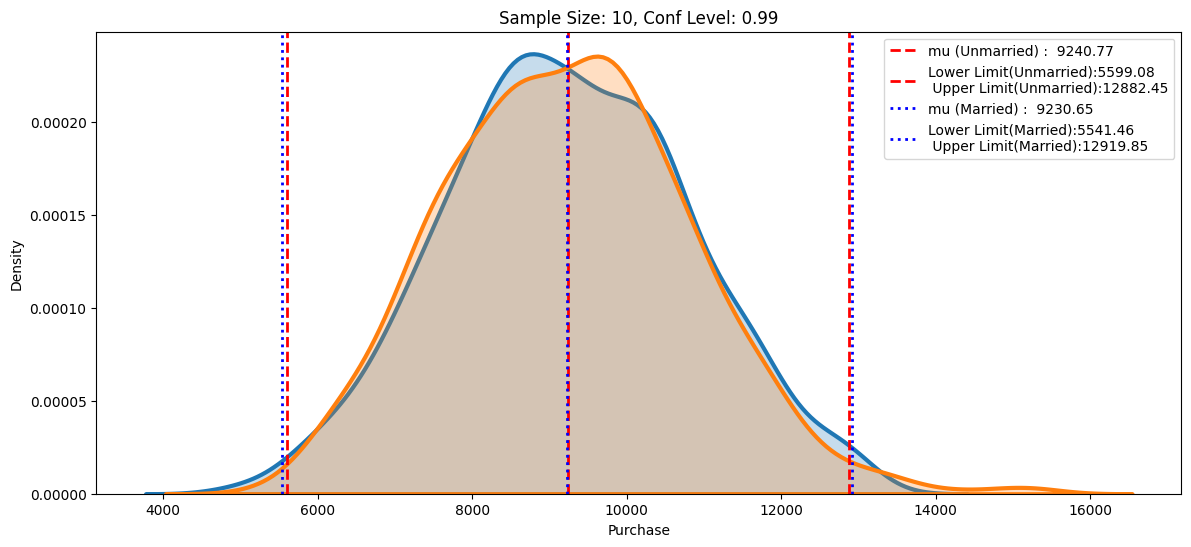

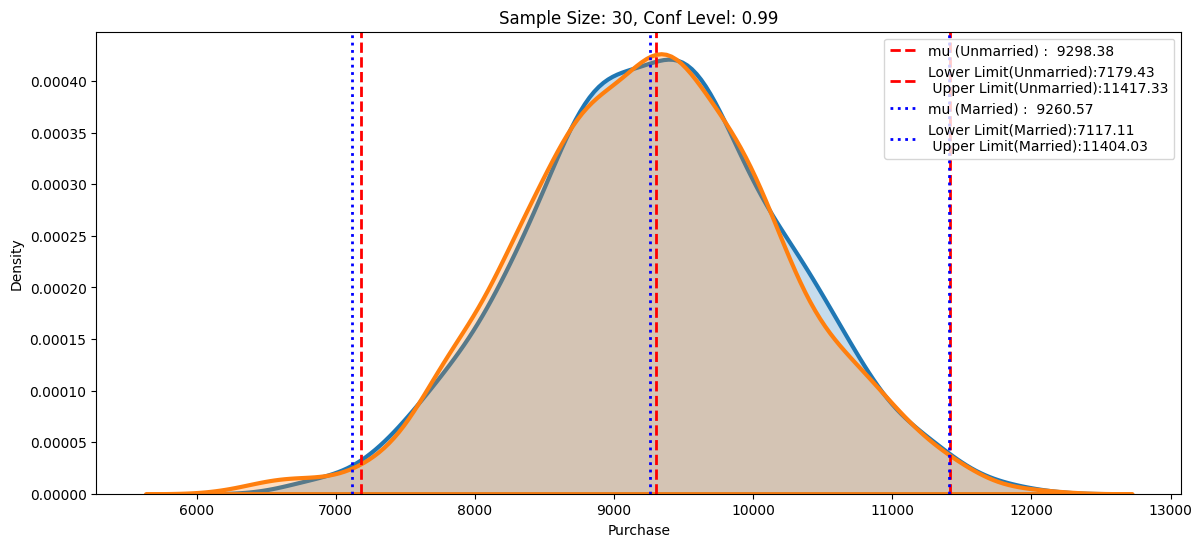

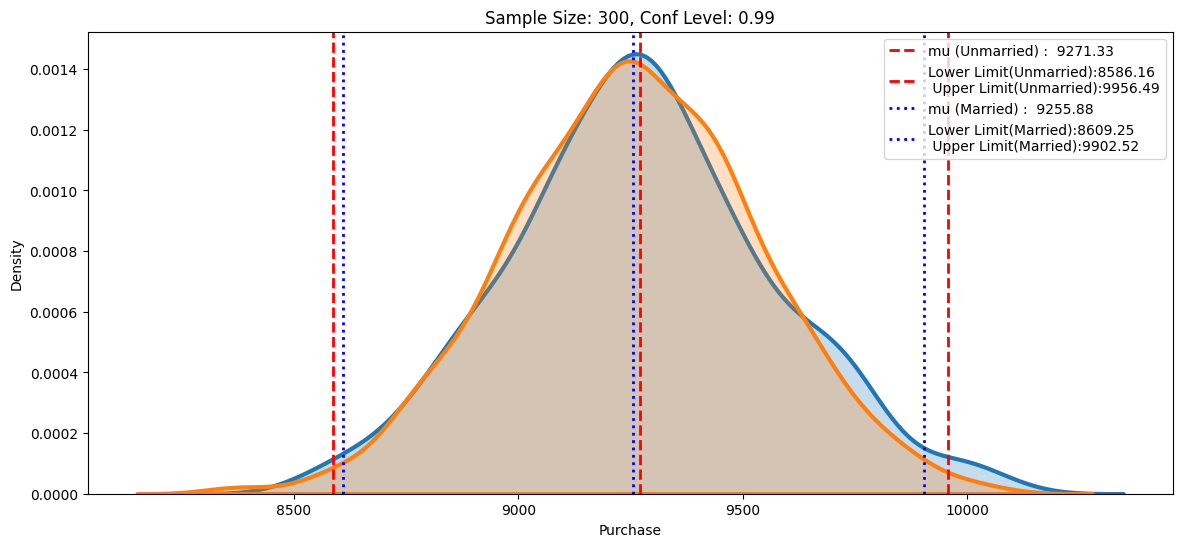

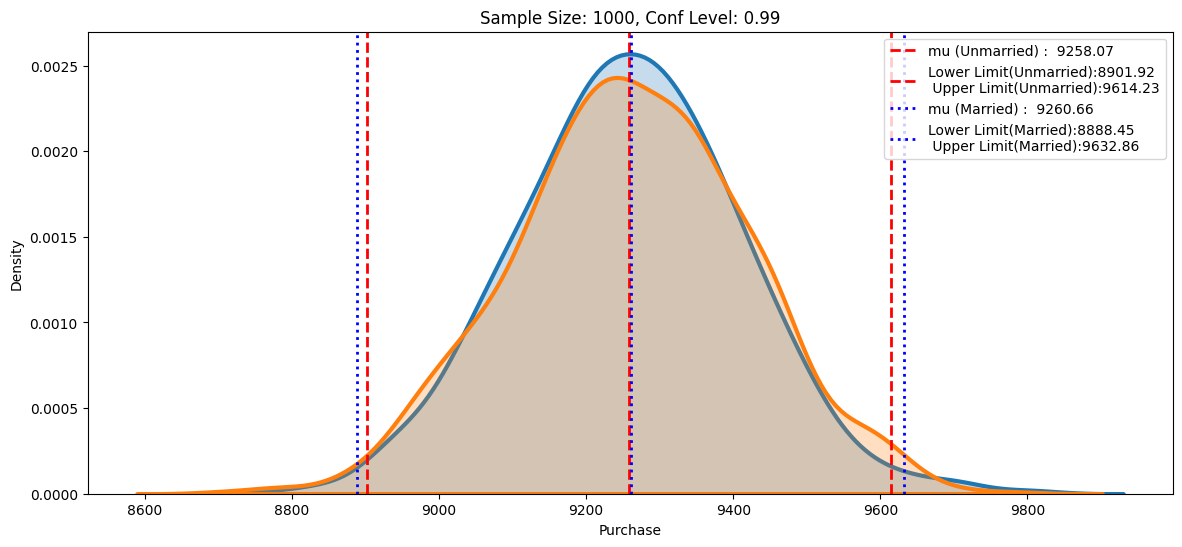

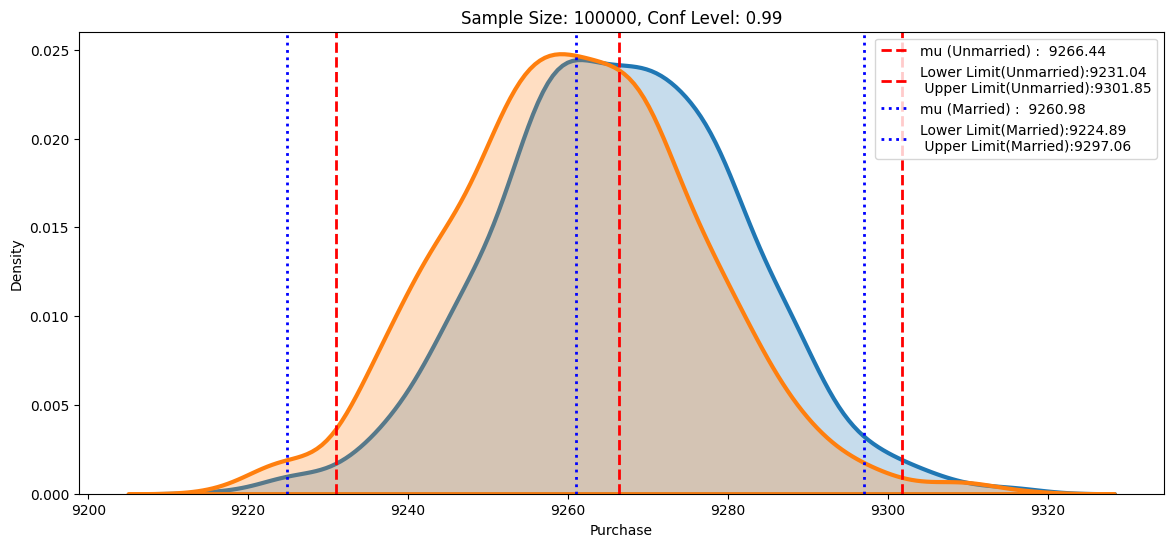

In [ ]:
itr_size = 1000
sampling_size_l = [1, 10, 30, 300, 1000, 100000]
conf_intrvl_l = [0.90, 0.95, 0.99]

df_married_purchase_l = [df_unmarried_purchase, df_married_purchase]
cat_l = ["Unmarried", "Married"]

for ci_i in conf_intrvl_l:
  print(f"\n Unmarried vs Married Sample distribution with ci:{ci_i*100}%\n")
  array = []
  for smpl_size in sampling_size_l:
    print("\n")
    avg, ll, ul = Sample_mean_distri_plot(df_married_purchase_l,
                                                                   cat_l,
                                                                   smpl_size, itr_size, ci_i)
    for i in range(len(cat_l)):
      array.append(np.array([cat_l[i], ll[i], ul[i], smpl_size, ul[i]-ll[i], ci_i]))

overlap_marital = pd.DataFrame(array, columns = ['Marital_status','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])


* As you can see from the above  distribution, there is not much of difference between distributions of Married and Unmarried populations, with average Purchase of Umarried slightly above Married.


# Age Group wise Purchase Analysis


 Age Sample distribution with ci:90.0%





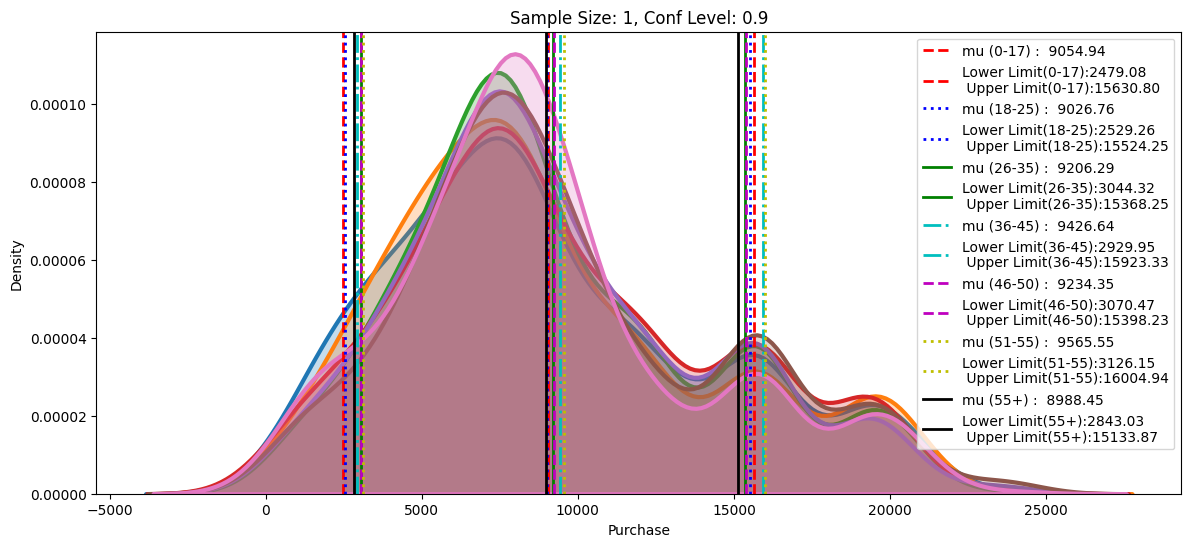

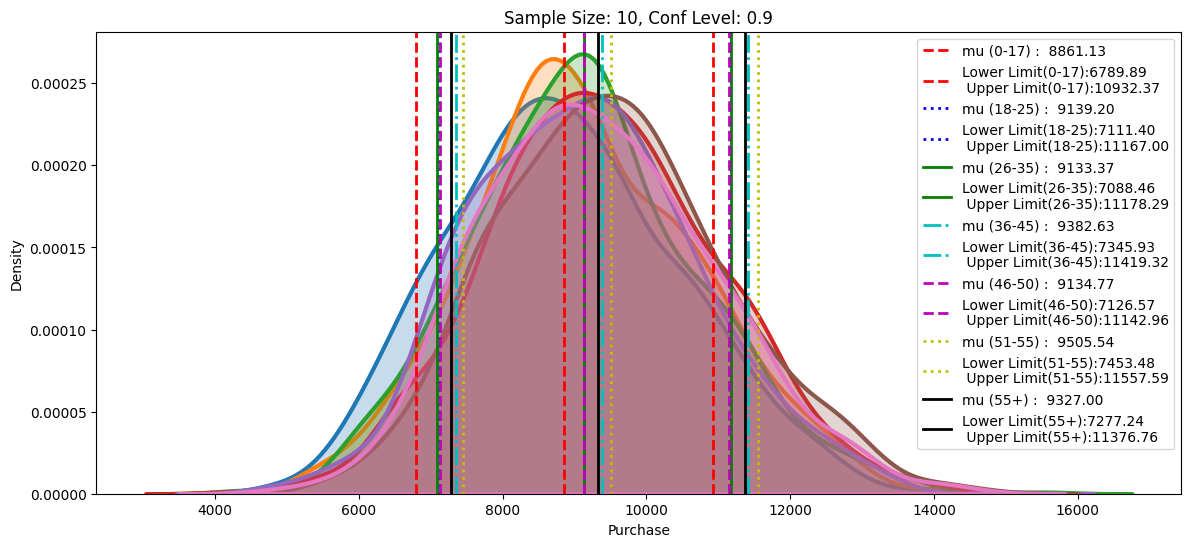

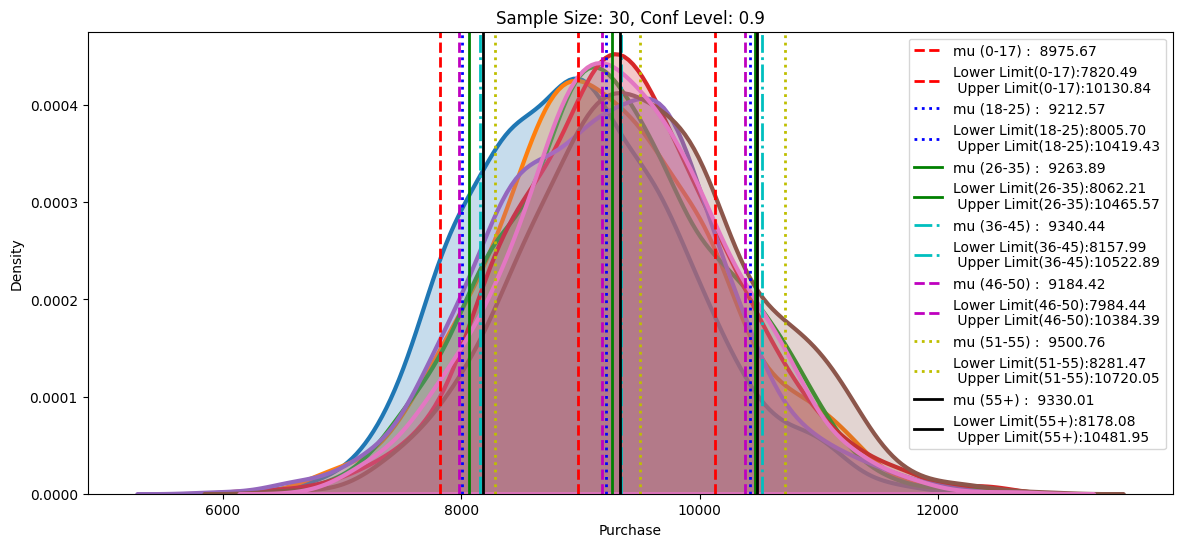

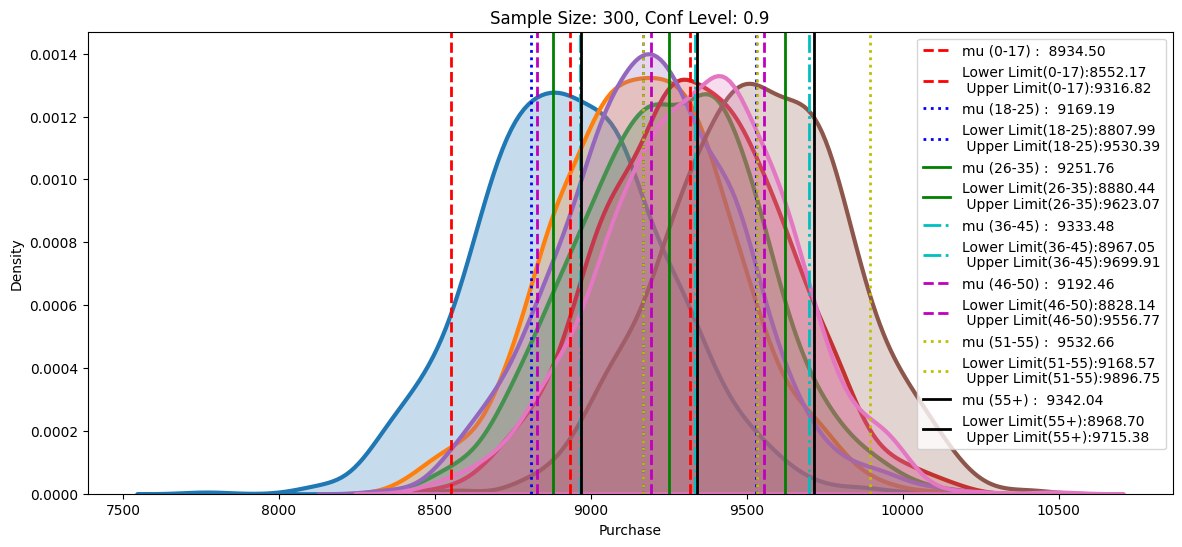

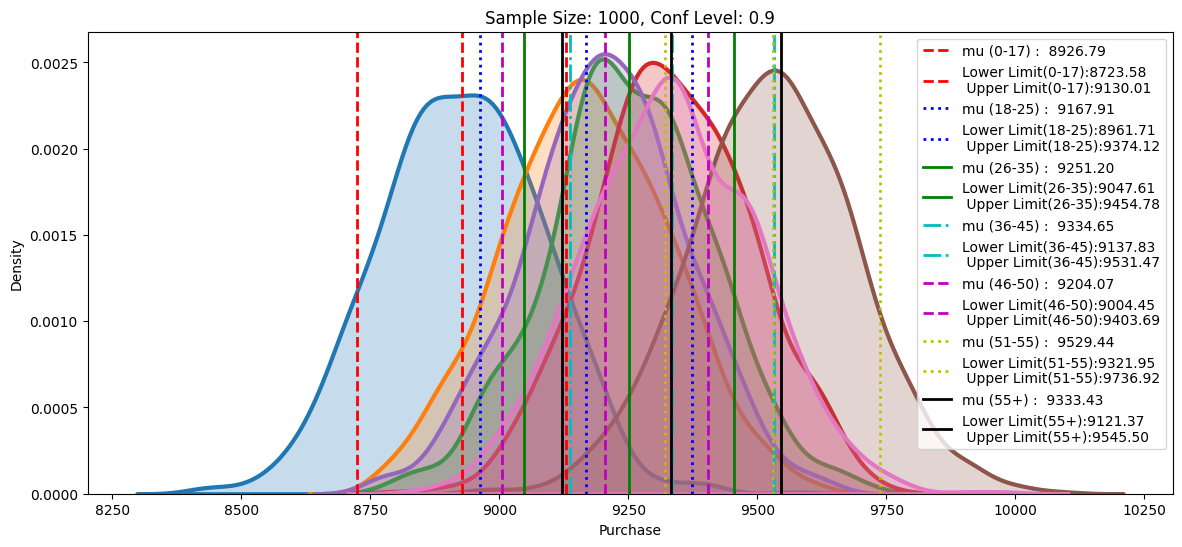

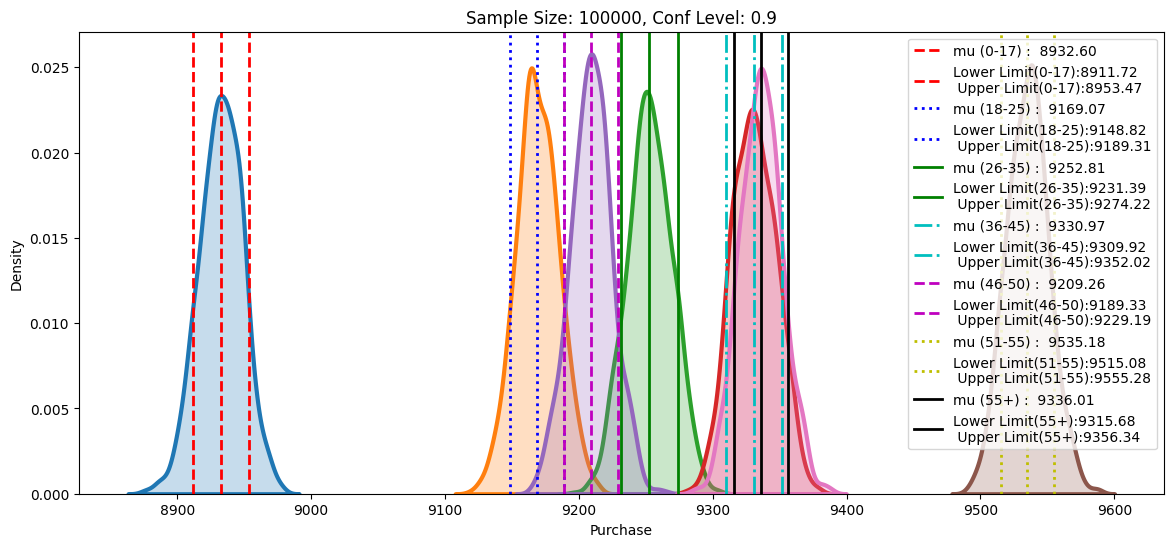


 Age Sample distribution with ci:95.0%





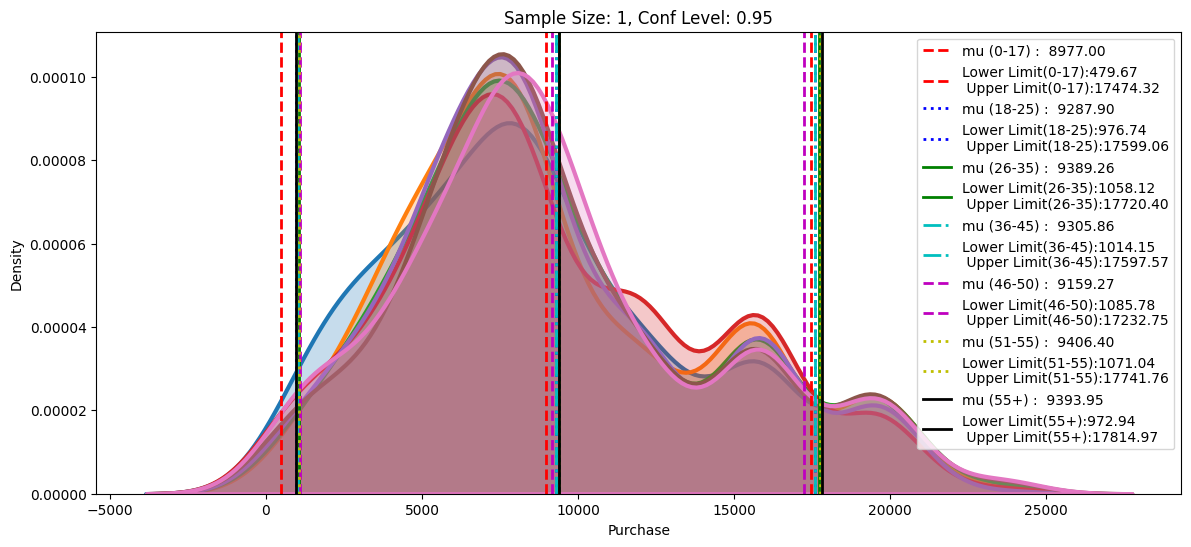

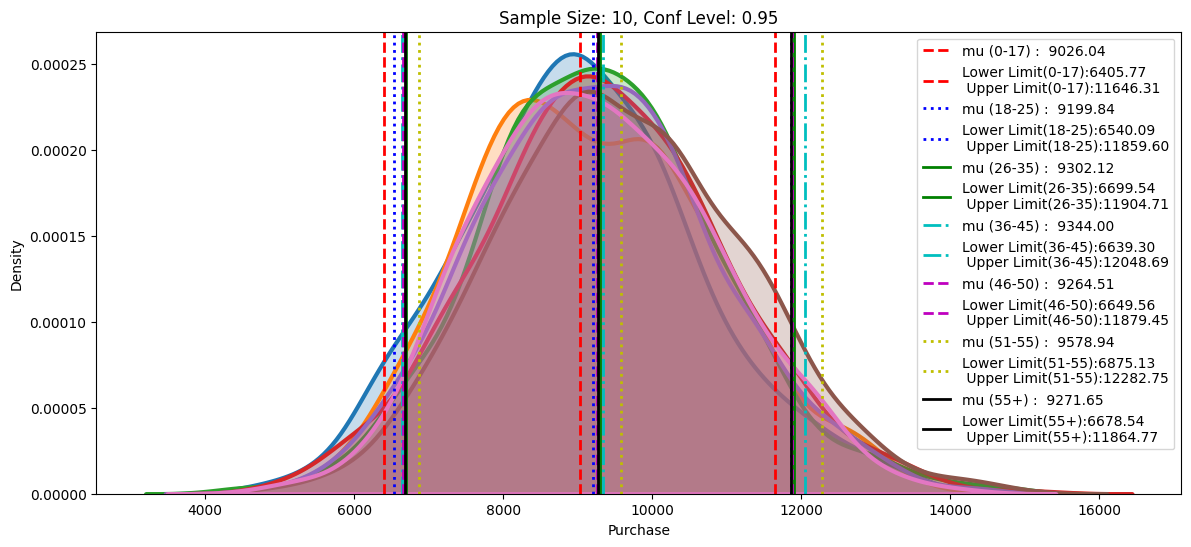

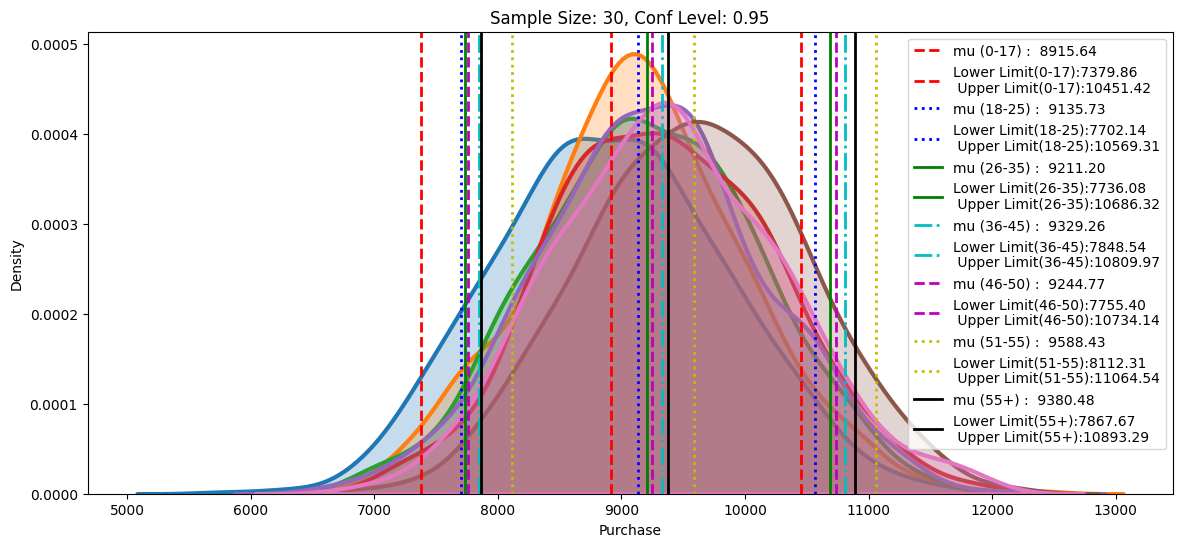

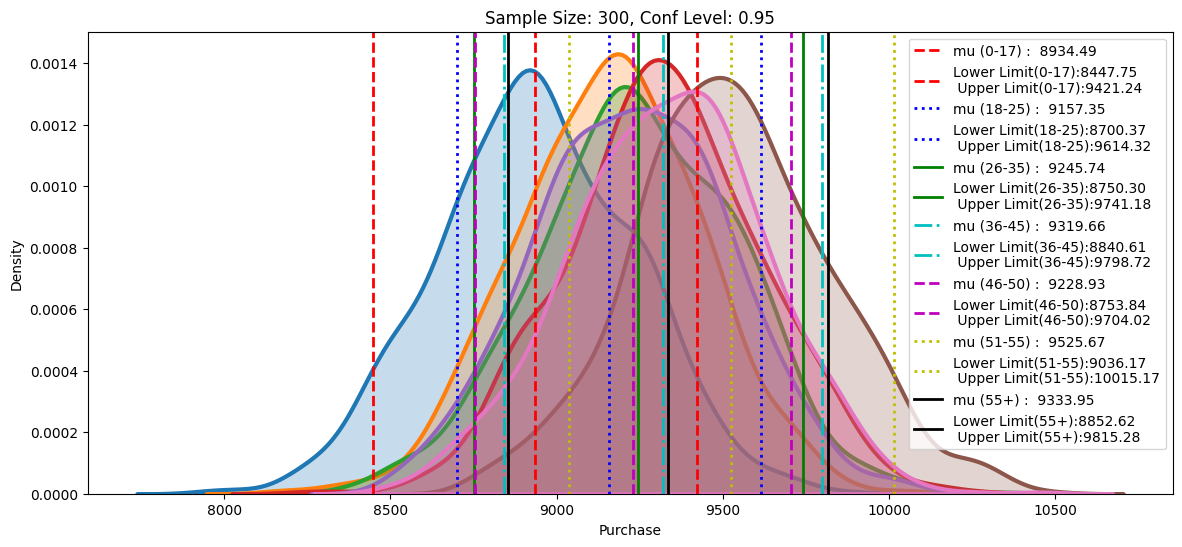

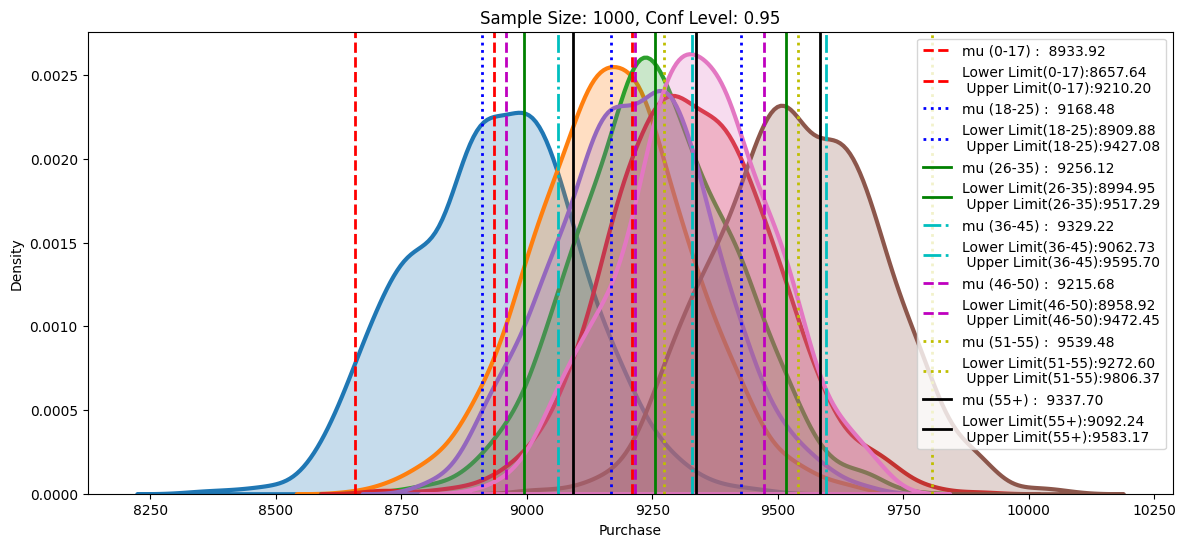

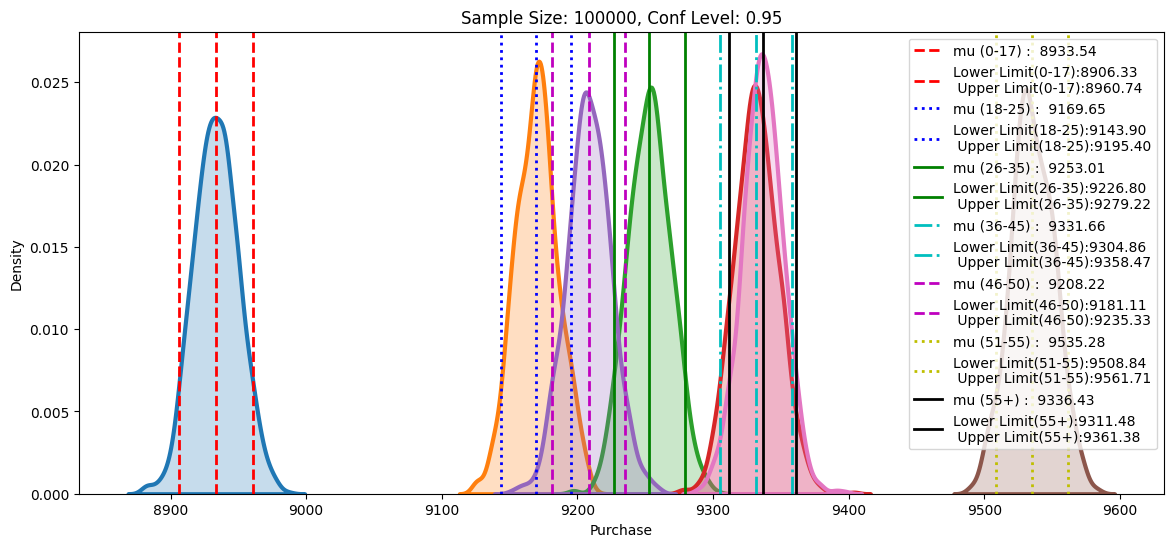


 Age Sample distribution with ci:99.0%





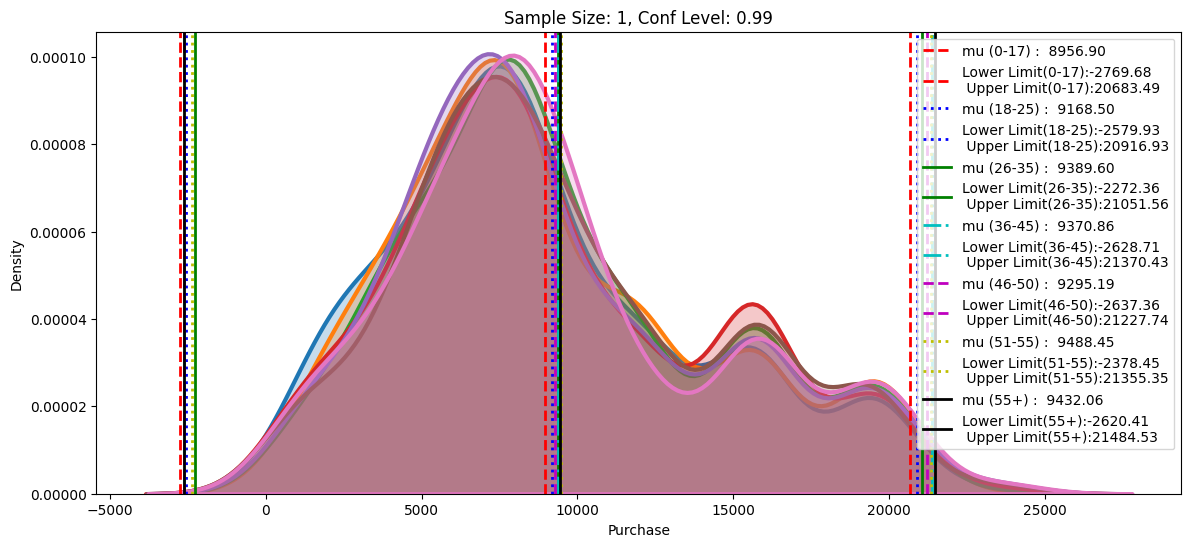

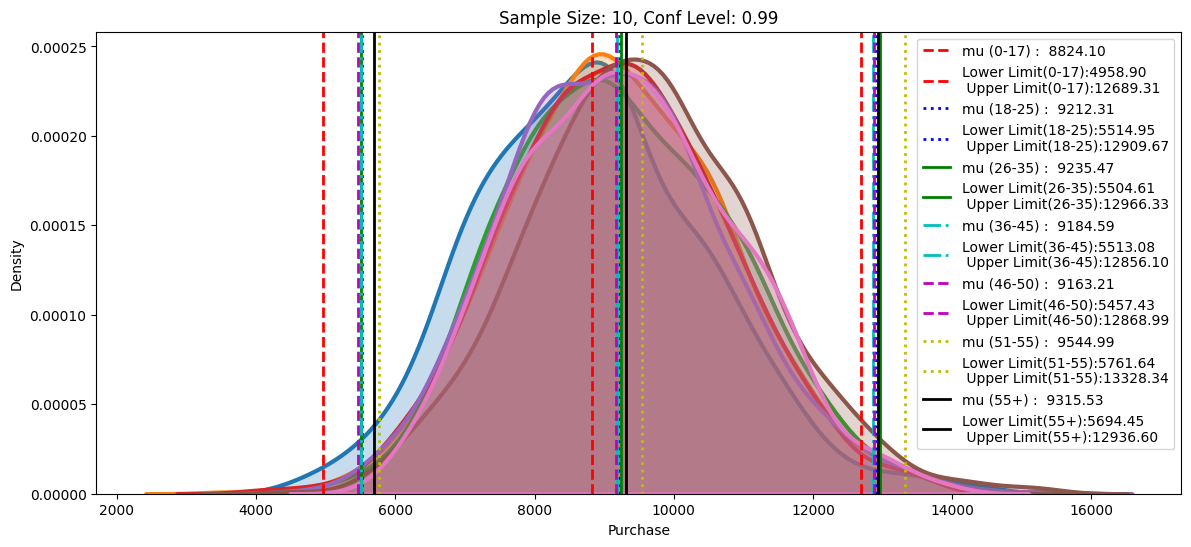

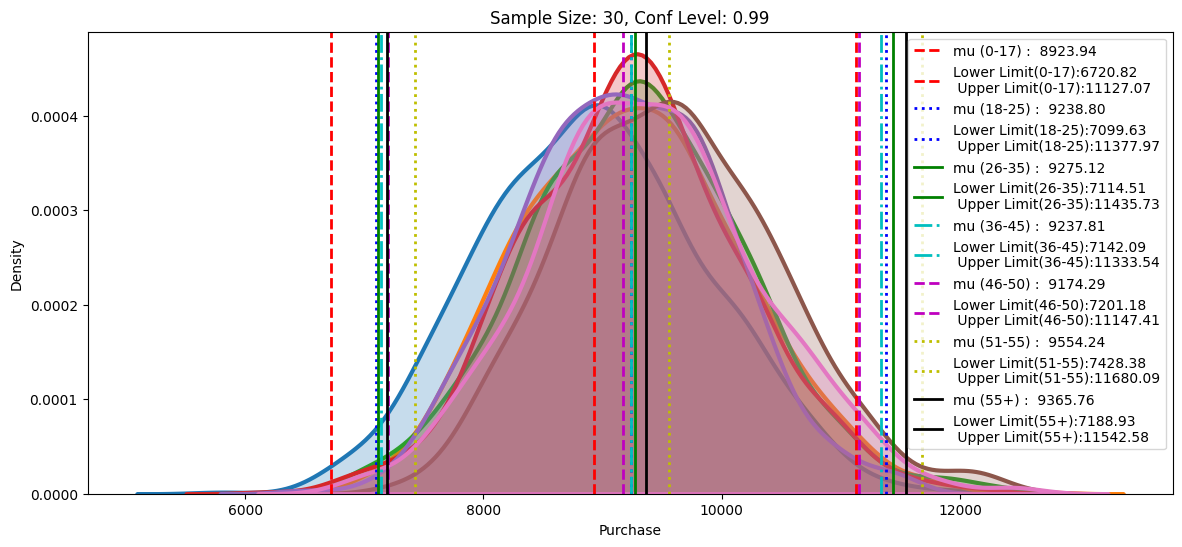

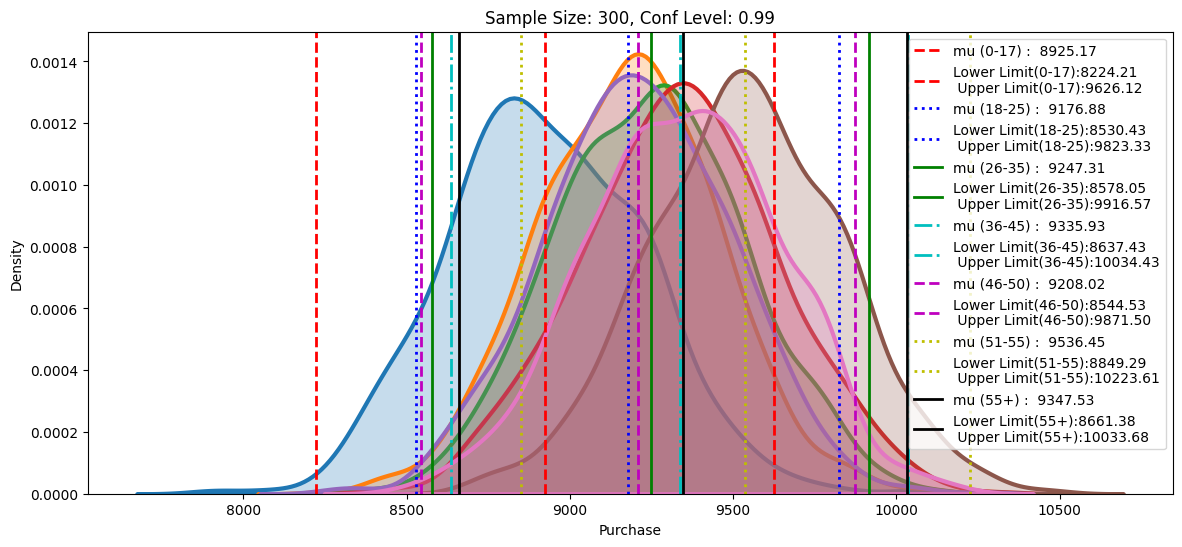

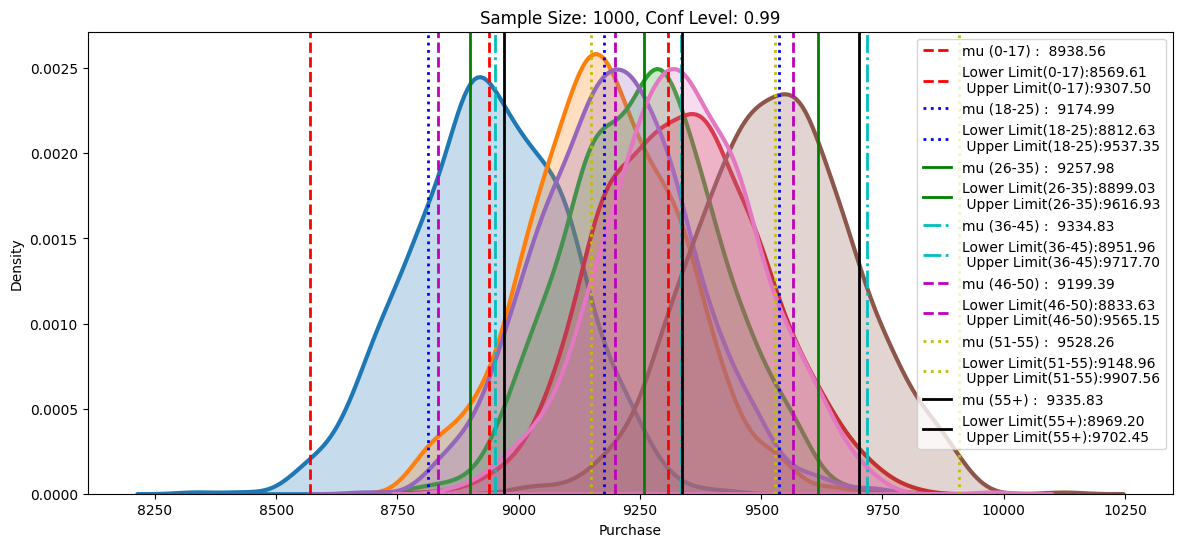

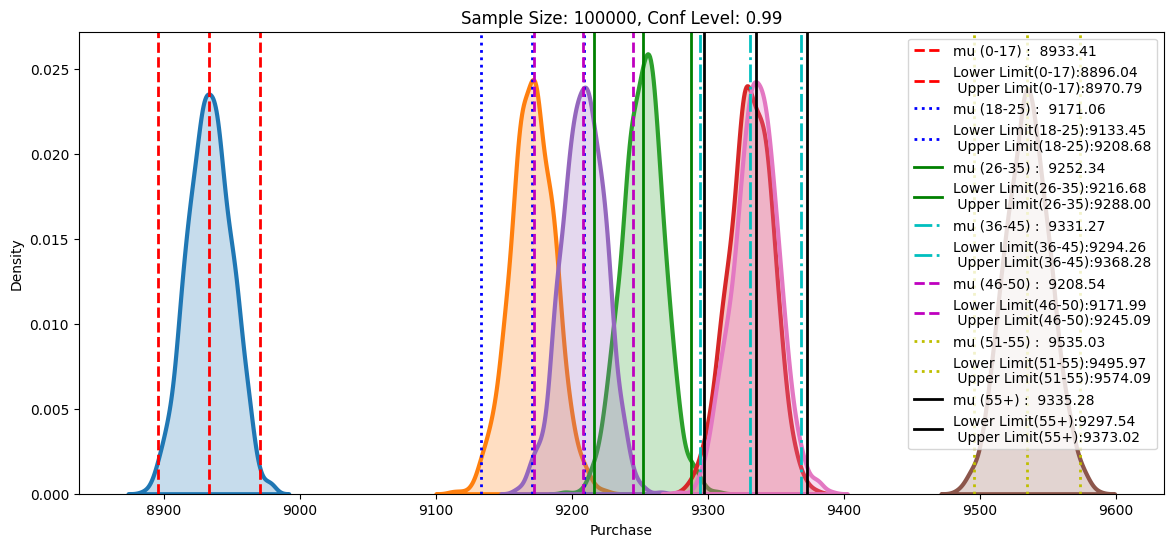

In [ ]:
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
df_age_l = []
for i in range(len(age_list)):
  df_cat_i = df_age_l.append(df[df['Age'] == age_list[i]]['Purchase'])

itr_size = 1000
sampling_size_l = [1, 10, 30, 300, 1000, 100000]
conf_intrvl_l = [0.90, 0.95, 0.99]

#df_married_purchase_l = [df_unmarried_purchase, df_married_purchase]
cat_l = age_list

for ci_i in conf_intrvl_l:
  print(f"\n Age Sample distribution with ci:{ci_i*100}%\n")
  array = []
  for smpl_size in sampling_size_l:
    print("\n")
    avg, ll, ul = Sample_mean_distri_plot(df_age_l,
                                          cat_l,
                                          smpl_size, itr_size, ci_i)
    for i in range(len(cat_l)):
      array.append(np.array([cat_l[i], ll[i], ul[i], smpl_size, ul[i]-ll[i], ci_i]))

overlap_age = pd.DataFrame(array, columns = ['Age','Lower_limit','Upper_limit','Sample_Size','Range','Confidence_pct'])

* From the above Agre group analysis, there is significant difference in distributions of different age groups with varying spend.
* With Least spend coming from 0-17, which seems obvious, as they are not earning much.
* Max average Spend coming from age group of 51-55, clearly event from the salary increases reaching the max.
* Interestingly the remaining 5 distributions linger around 9100 and 9400.
* and 35-45 and 55+, has exactly same distributions.

#Business Insights and Recommendations:

- As mentioned in the above analysis, it is clearly evident that the Male purchase, both average and total is bigger than the Females spend. It is recommended to introduce Female centric products in the shelves. It can also happen that average female purchaser is choosing the affordable items. This problem can be solved by giving attention to premium products and encourage the female customer to buy from the premium and upper premium range to encourage more spend.
- From the Marital status purchaser analysis, it si clear that there is no much difference between them. However, post marriage the average expenses increase. It looks like there aren't many couple friendly products or post marriage products in the shelves, it is encouraged  to focus on the kids and infants section to encourage more spend.
- Age group analysis, seems like what is expected. the least spenders are the ones who are not yet earning or earning less- the ones from age group 0-18 and the most spenders are from  the older age. to lessen the gap between the agre groups about the average, it is advised to focus on the other age groups who are not spending .